In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
%run -i 'load_data.py'

In [3]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

In [4]:
if not os.path.exists('plots3'):
    os.makedirs('plots3')
    
    
if not os.path.exists('plots3/figure1'):
    os.makedirs('plots3/figure1')
    os.makedirs('plots3/figure2')
    os.makedirs('plots3/figure3')

In [5]:
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['nt_coverage'], 'Cadm1_2', 10)
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['nt_coverage'], 'Cadm1_2', 10, 
#          filter_cells=False)

In [6]:
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 'Rpn2_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Clta_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Mff_3', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Tecr_4', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Idh3g_1', 10)
# plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_c, 'Zfp207_1', 10)


In [7]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [8]:
chen_ES2i_filtered = process_subpop(chen_ES2i, chen_PSI, chen_mrna_counts, 
                                    mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_ES_filtered = process_subpop(chen_ES, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_Epi_filtered = process_subpop(chen_Epi, chen_PSI, chen_mrna_counts, 
                                   mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)
chen_MN_filtered = process_subpop(chen_MN, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 6, 10)


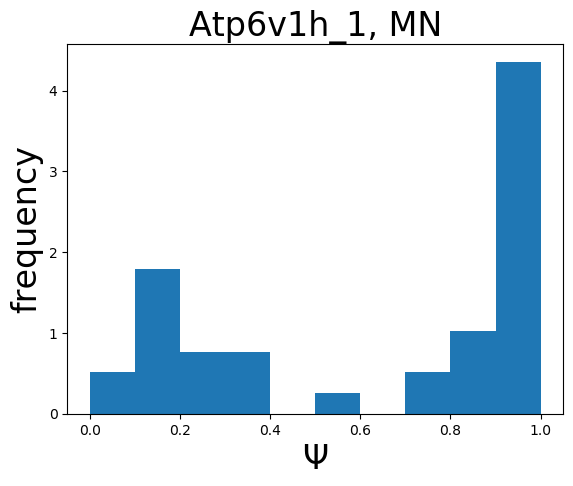

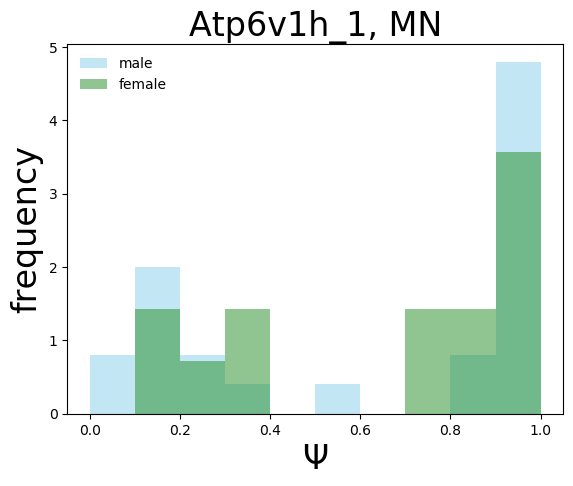

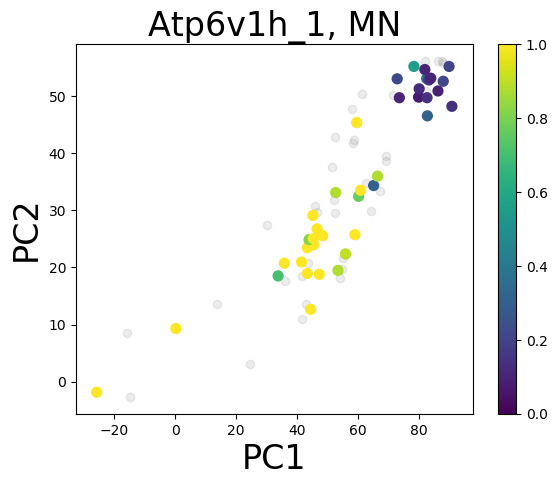

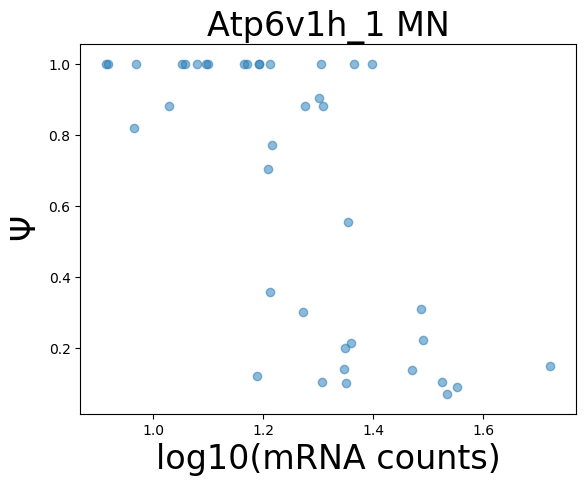

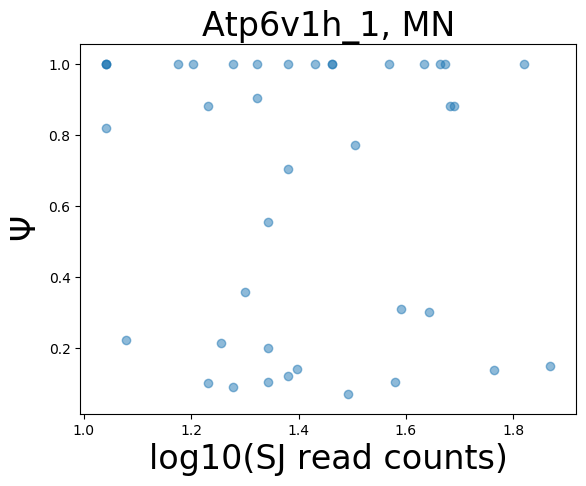

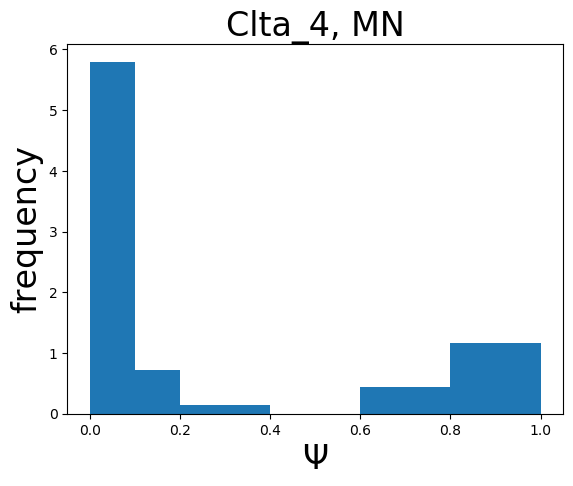

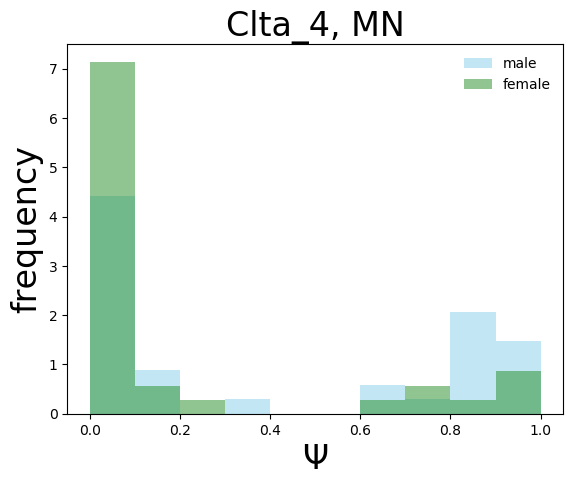

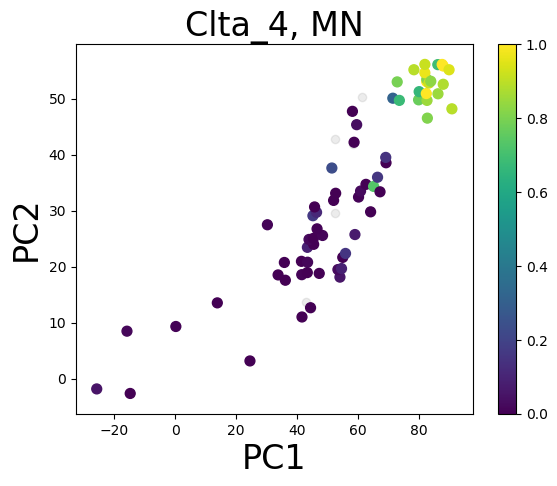

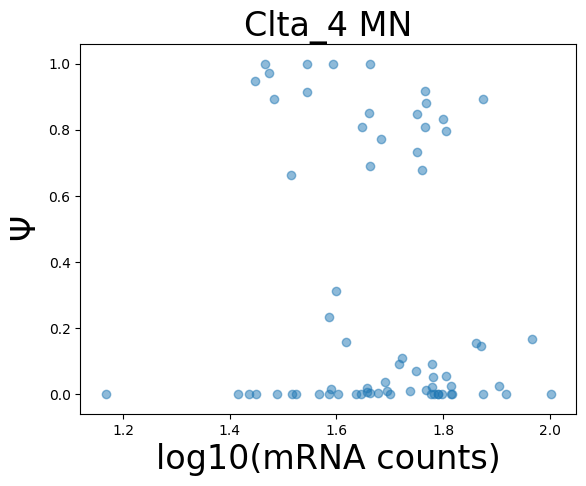

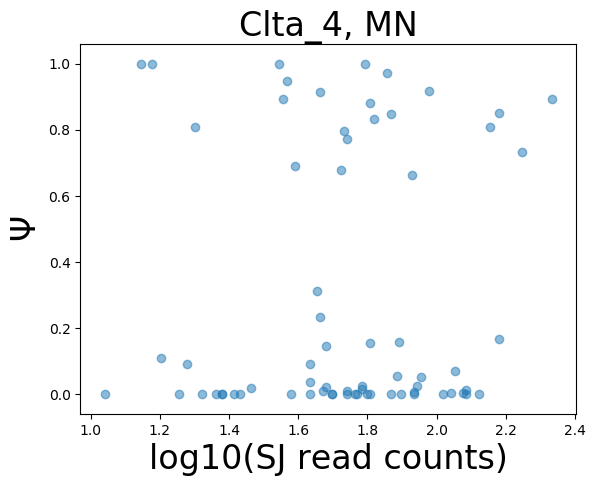

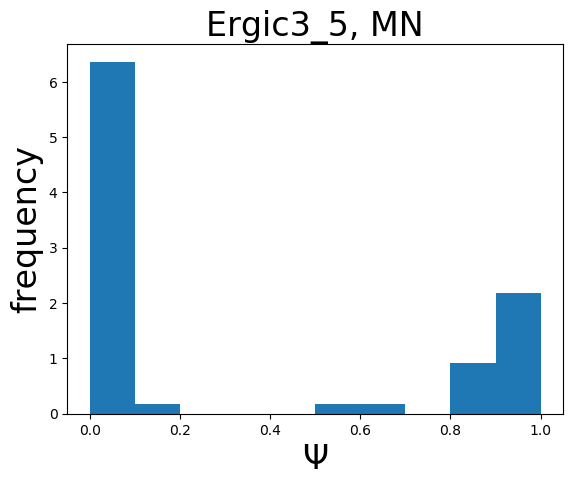

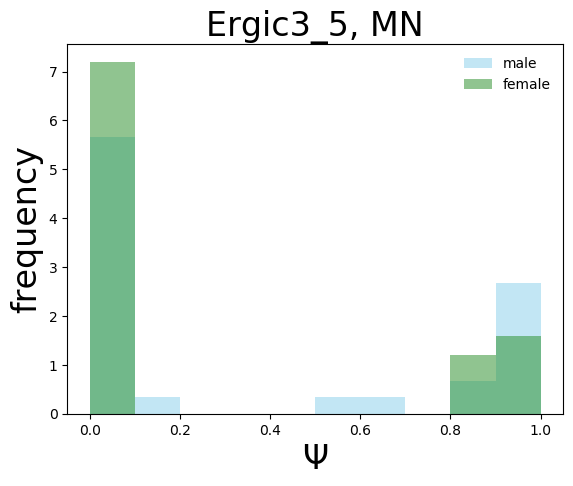

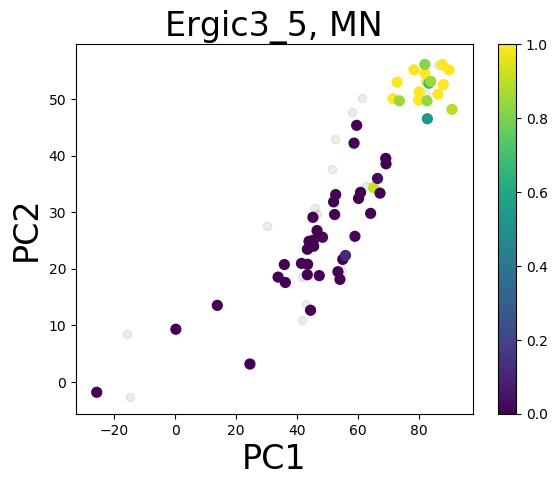

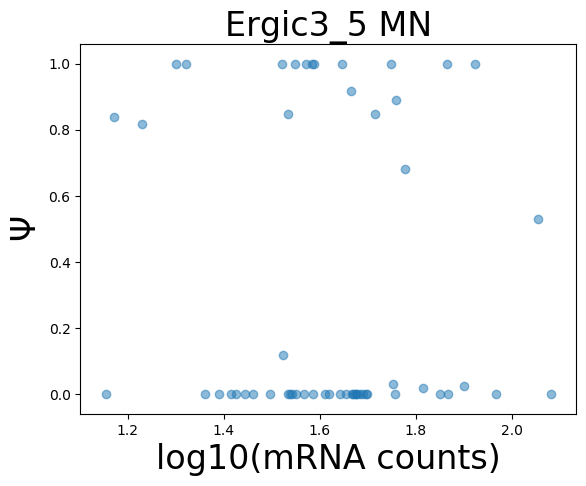

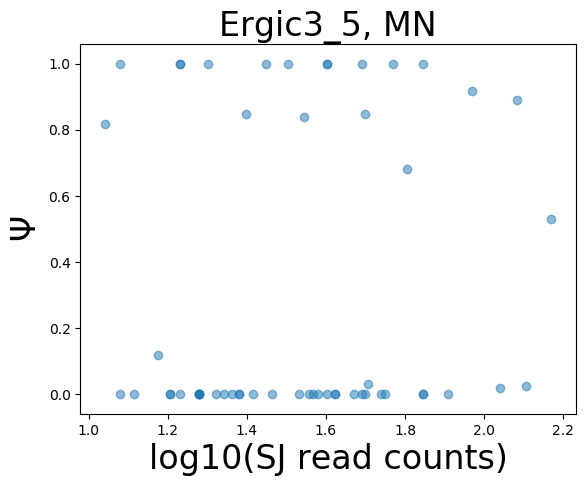

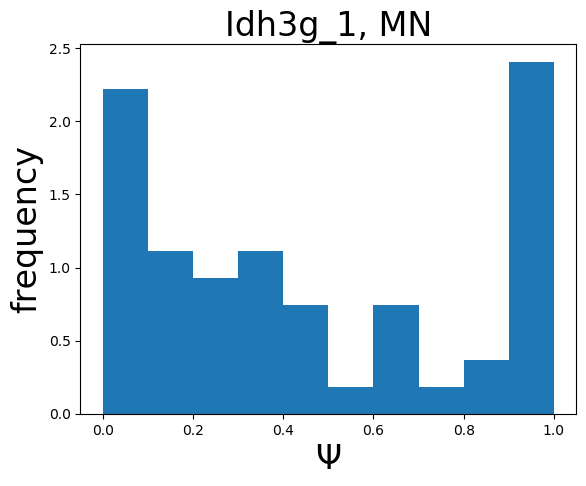

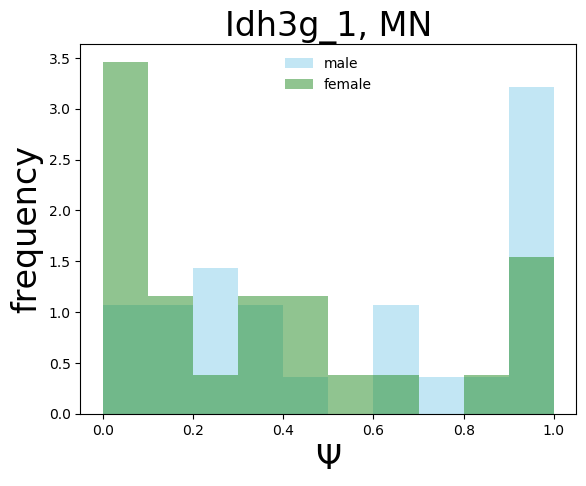

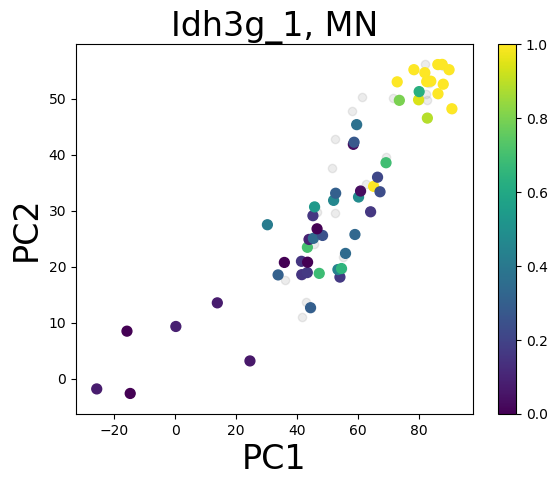

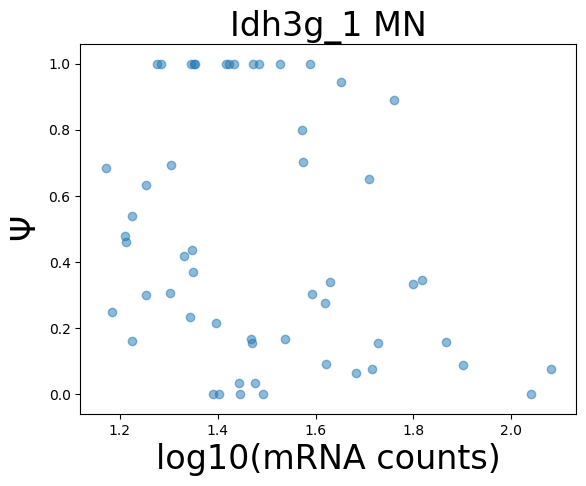

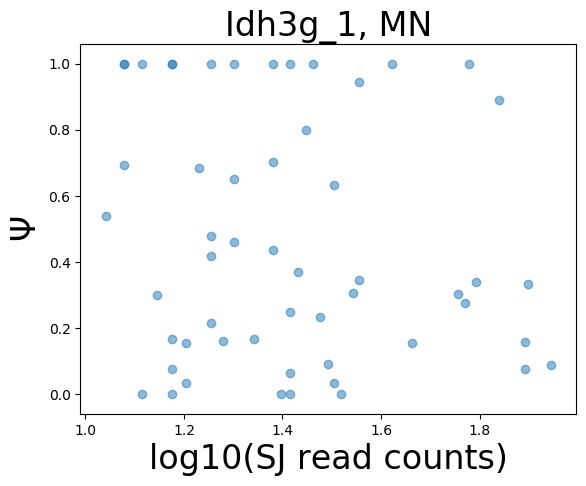

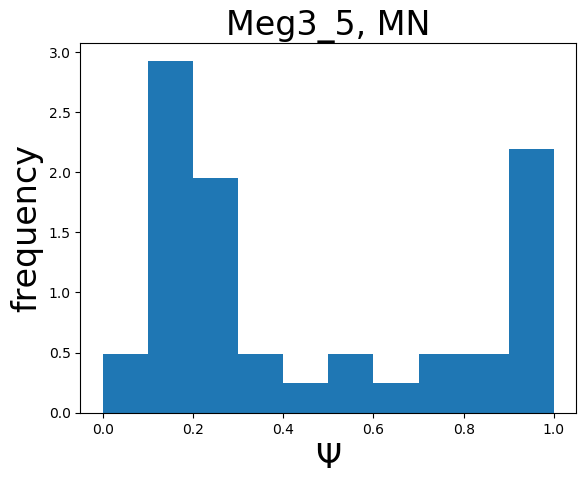

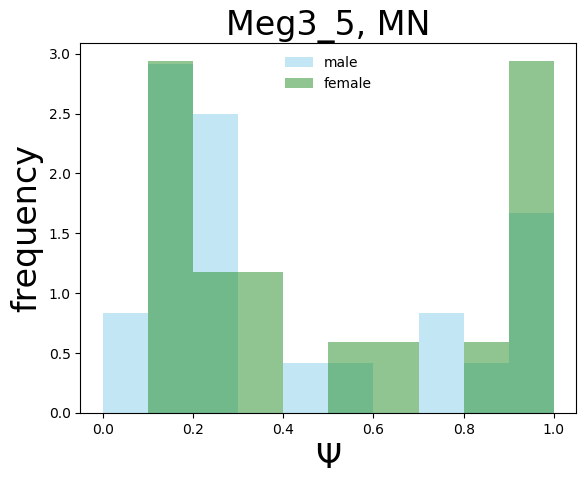

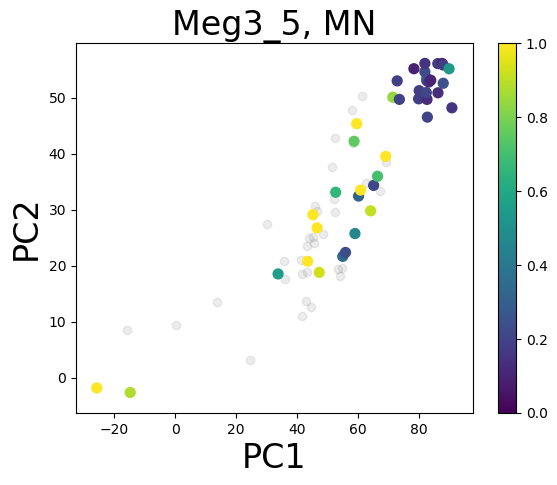

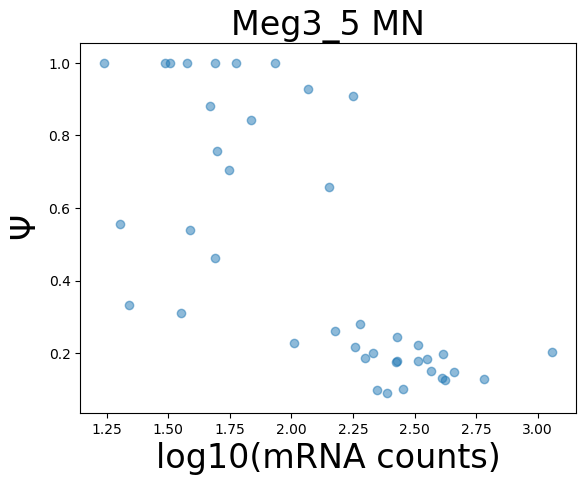

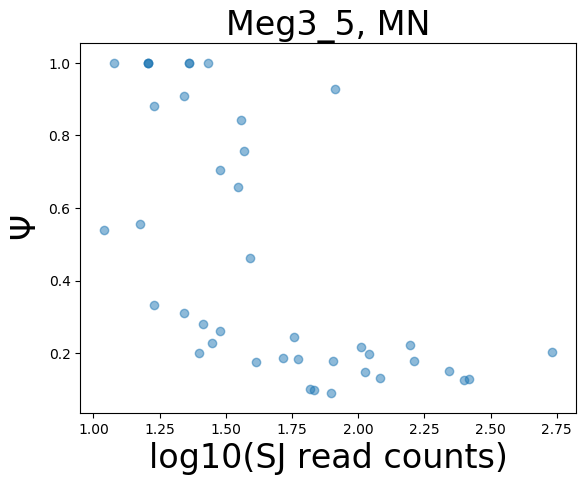

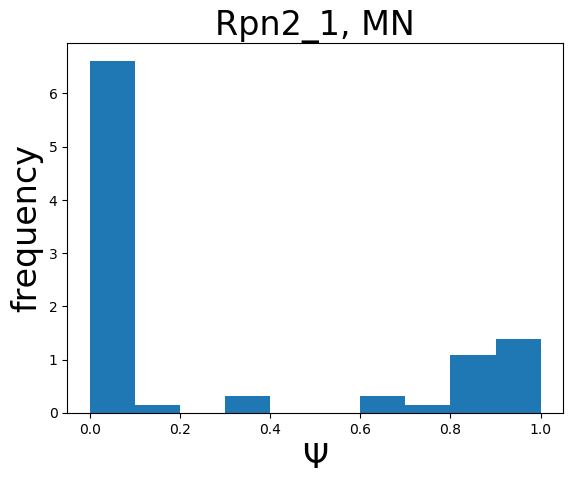

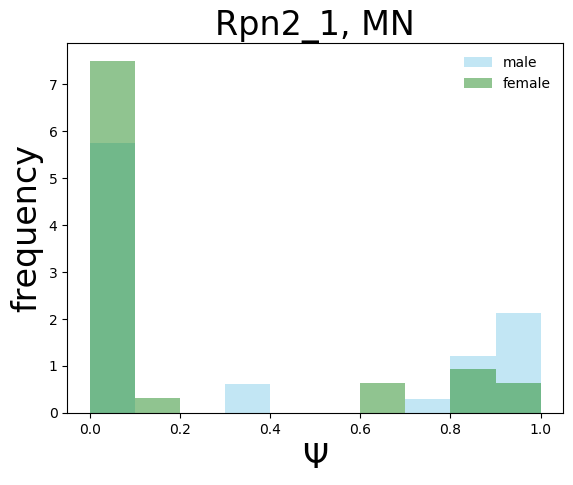

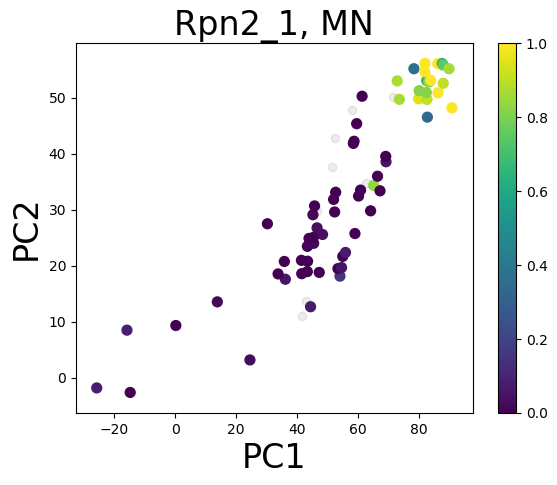

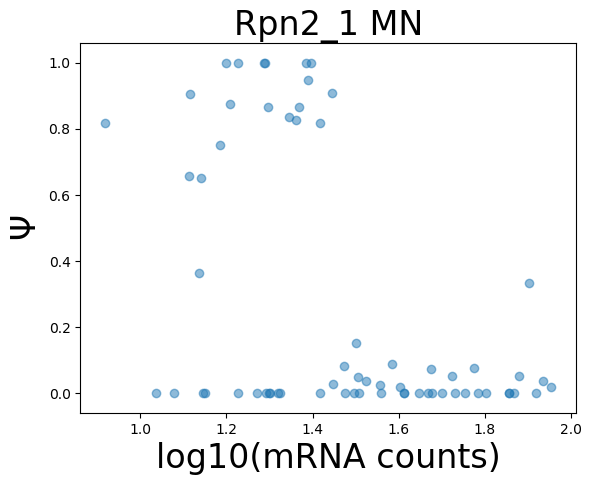

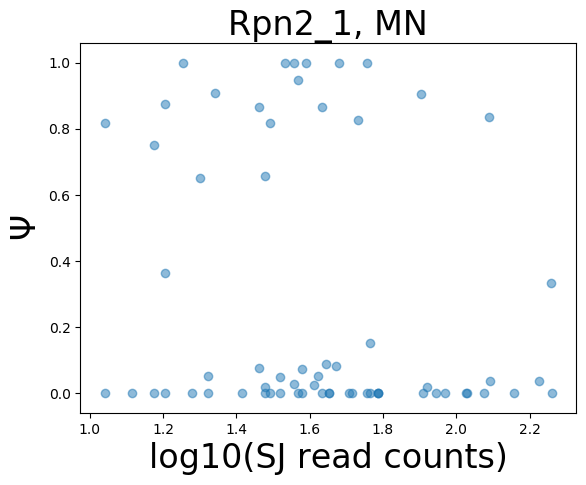

In [9]:
filtered_bimodal([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

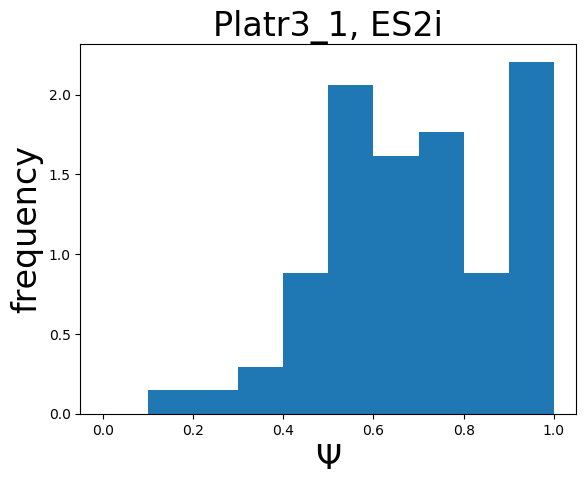

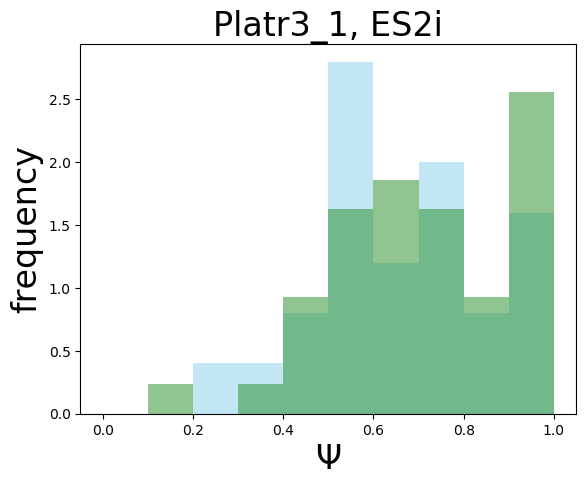

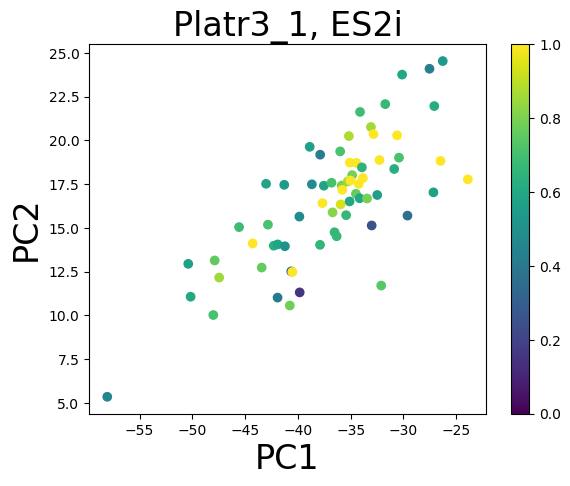

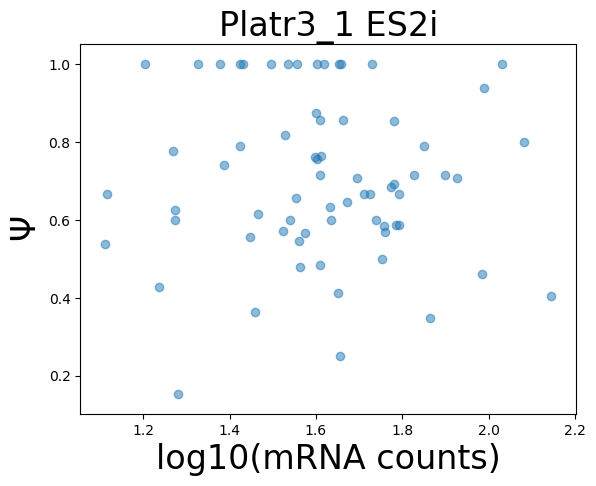

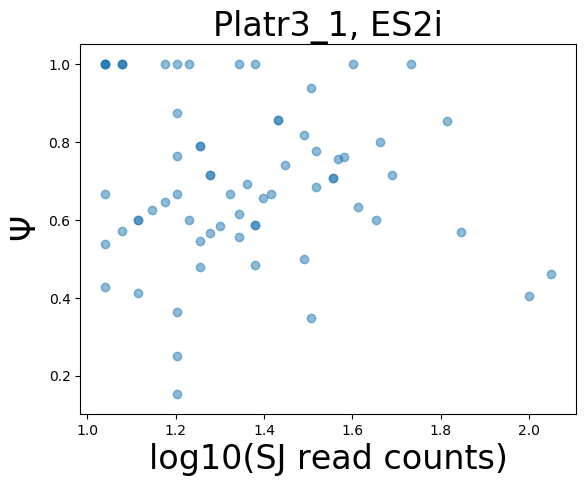

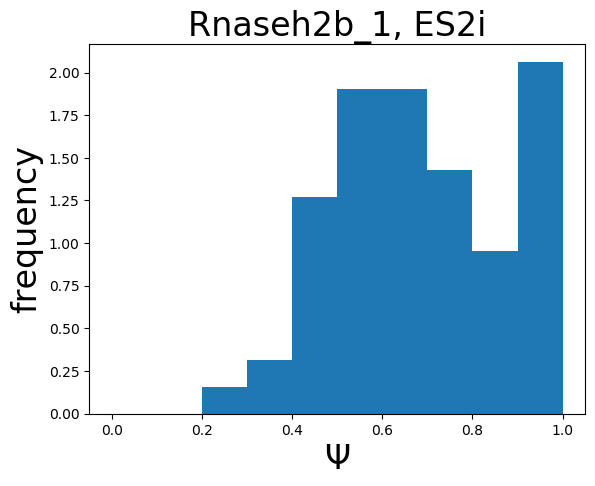

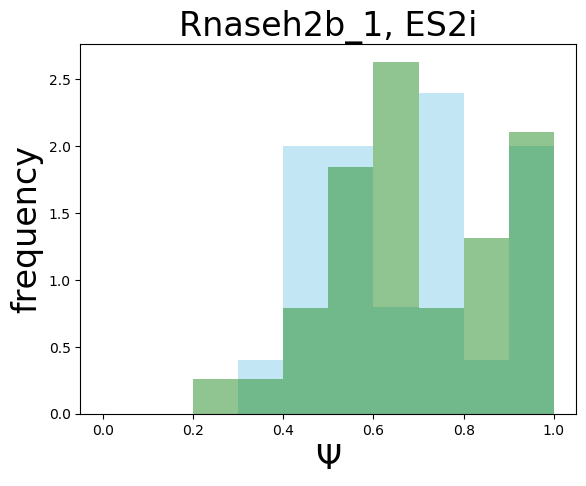

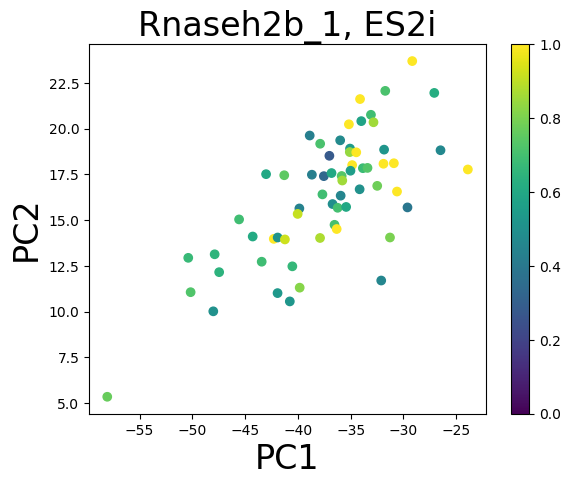

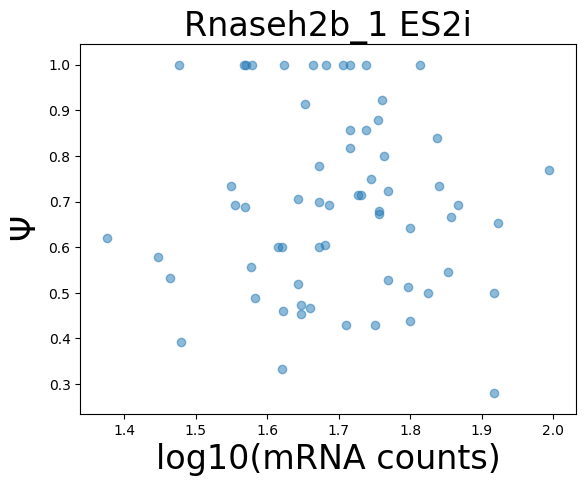

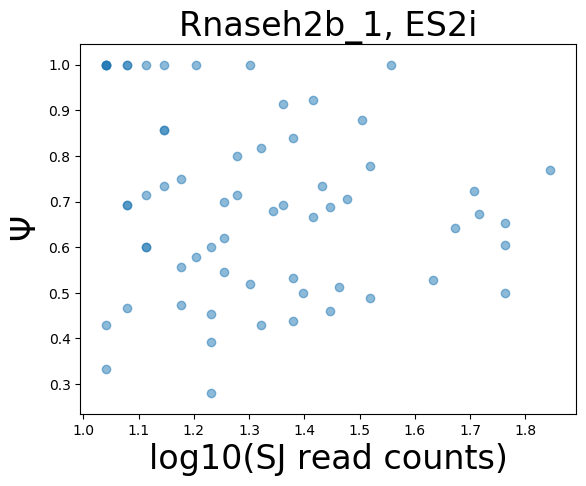

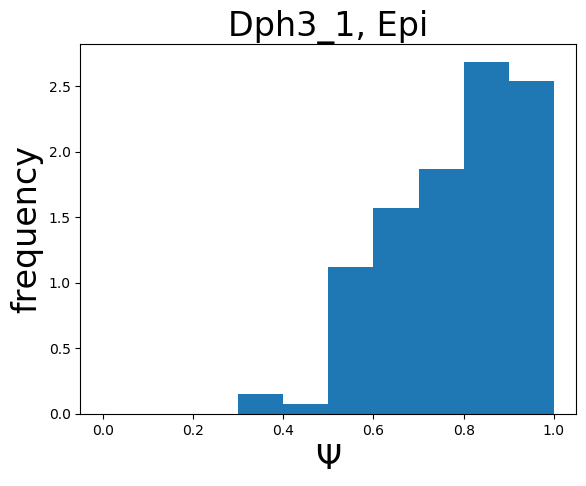

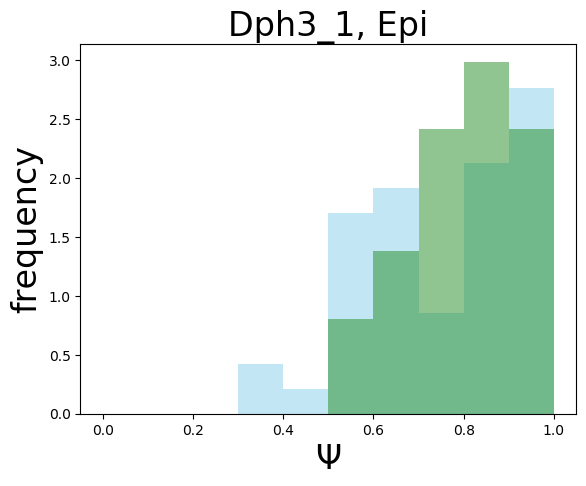

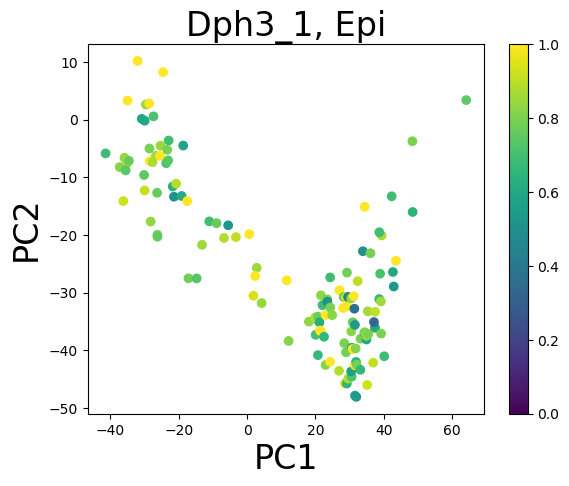

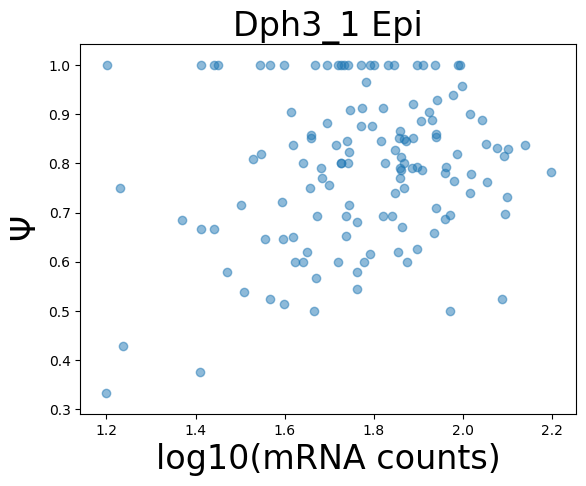

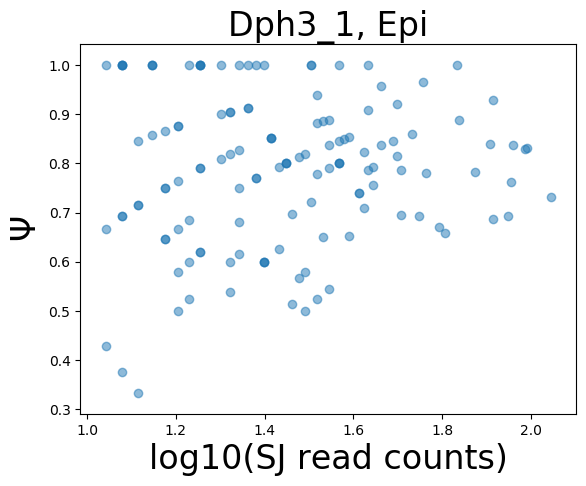

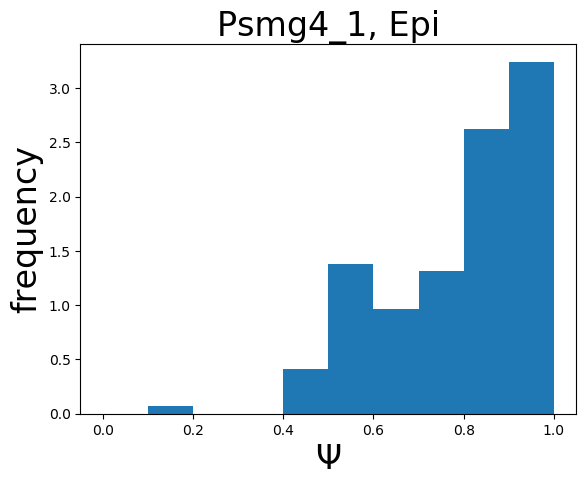

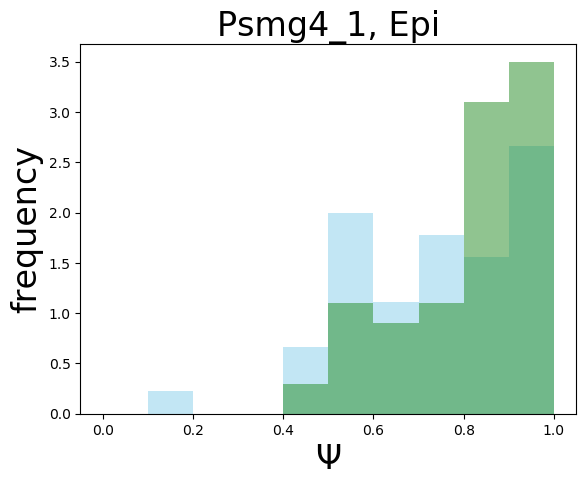

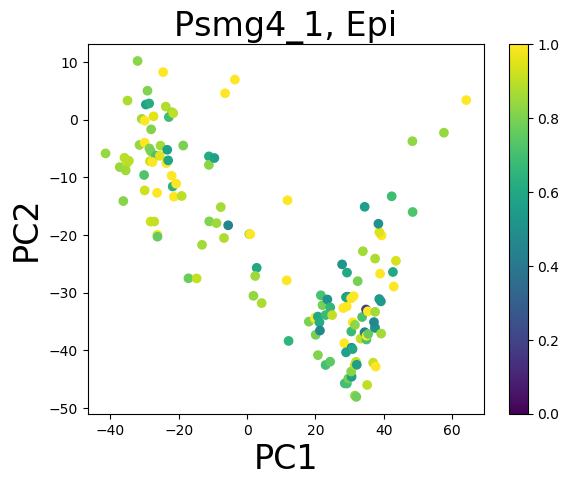

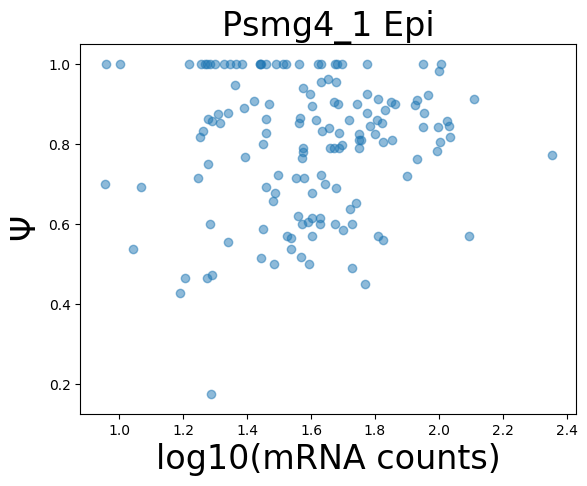

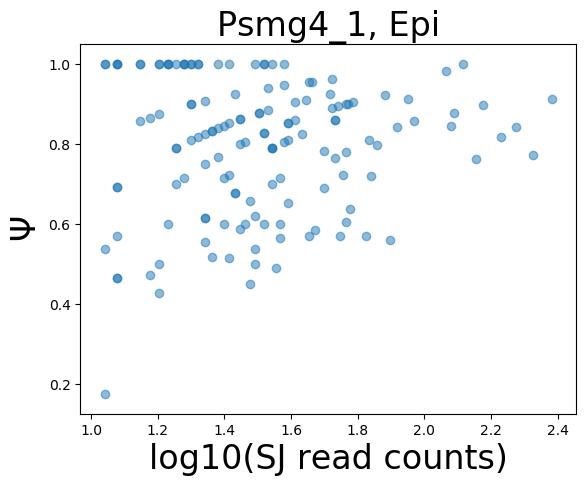

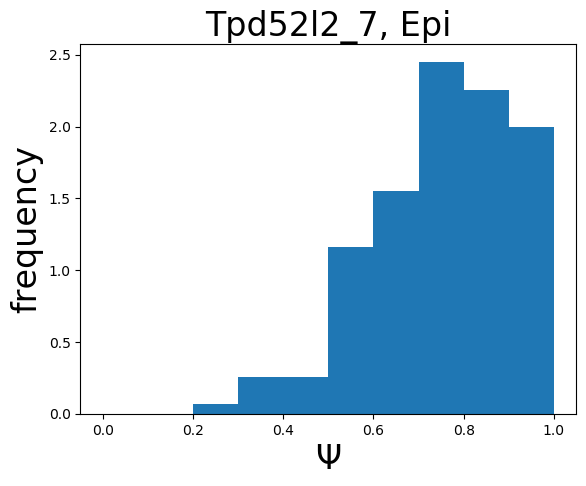

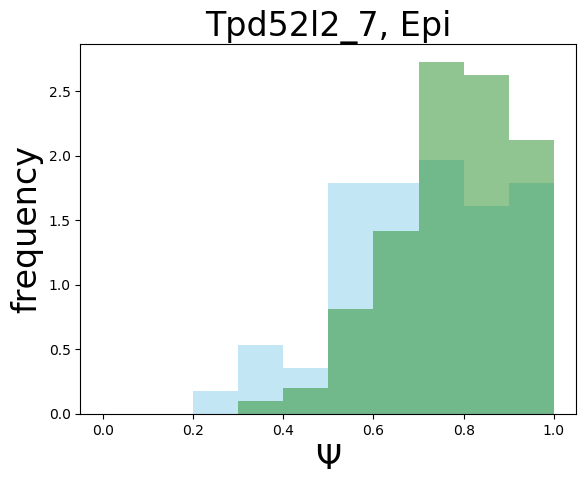

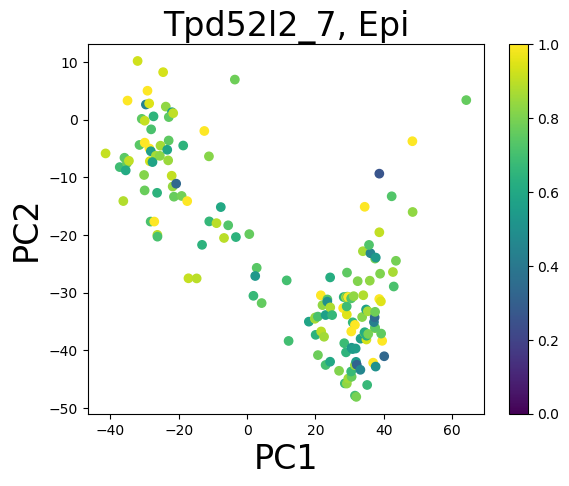

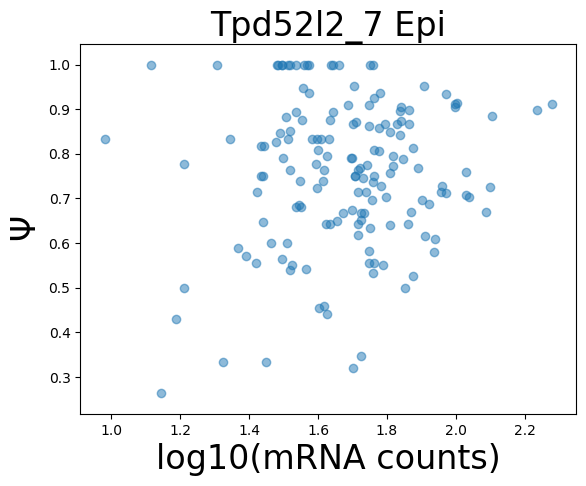

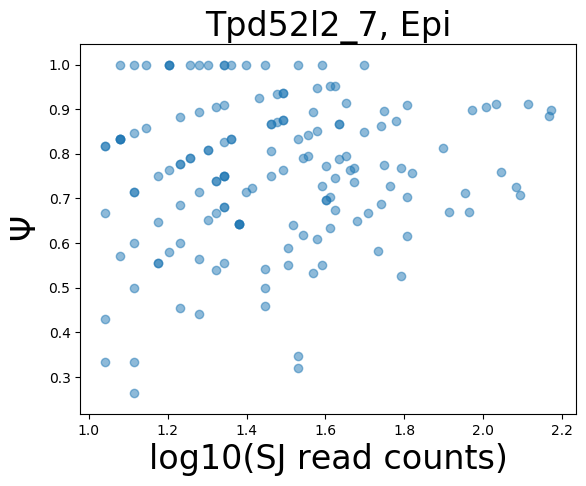

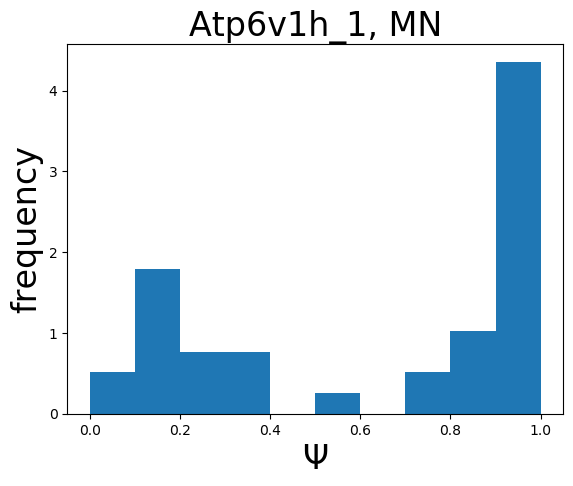

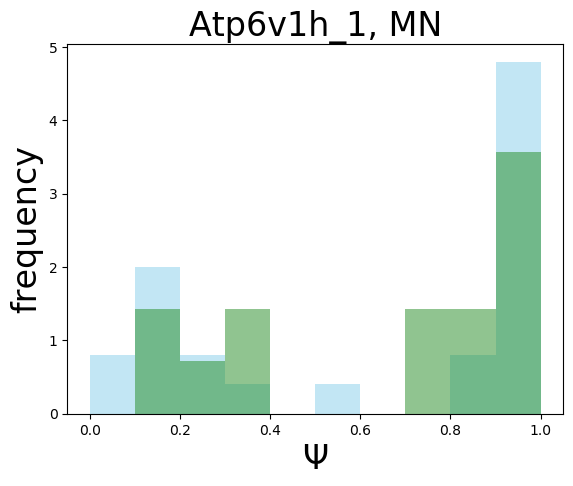

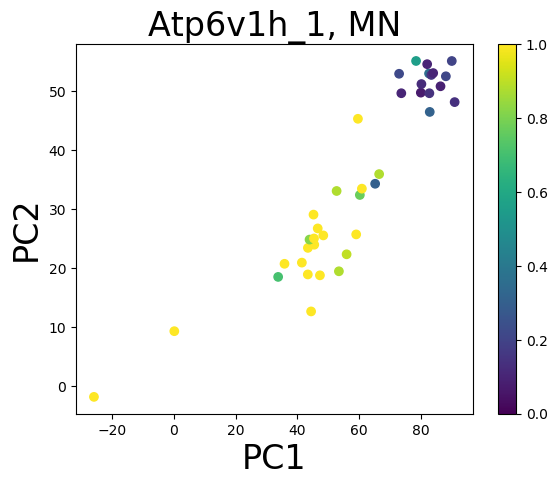

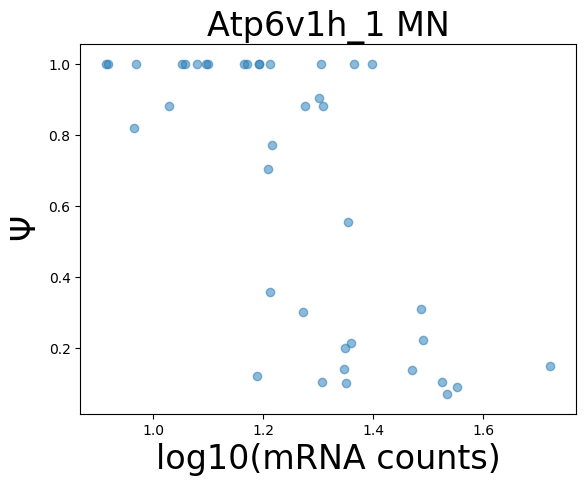

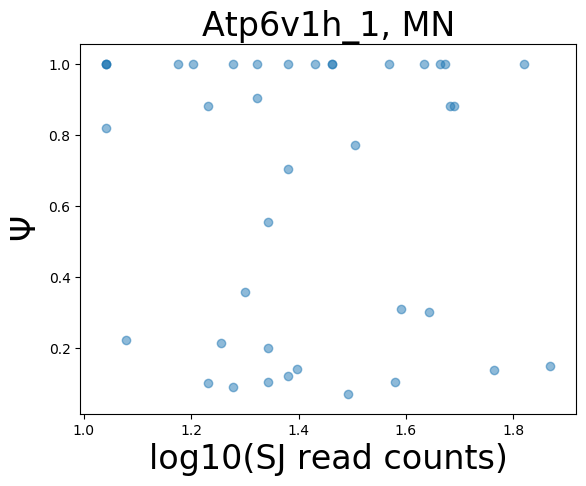

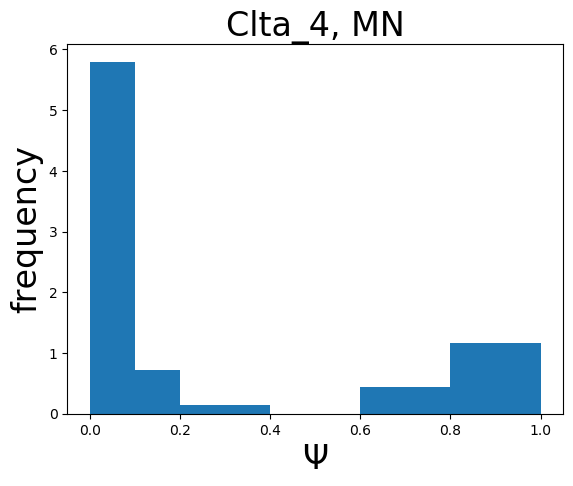

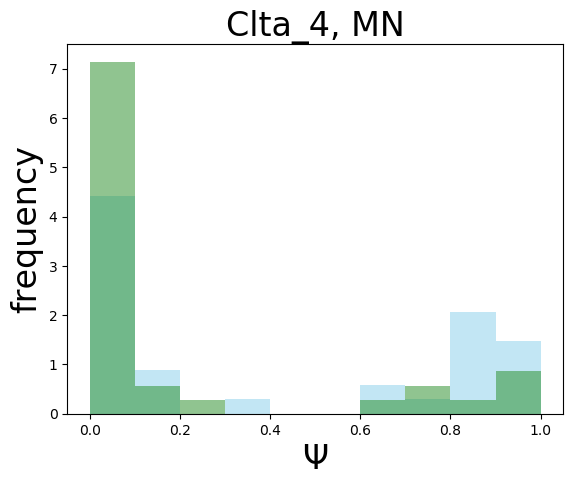

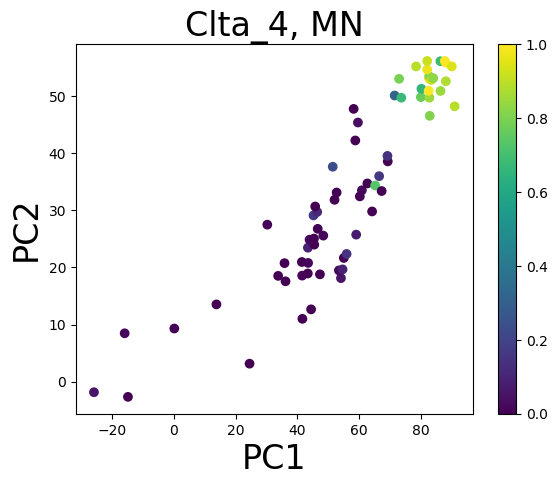

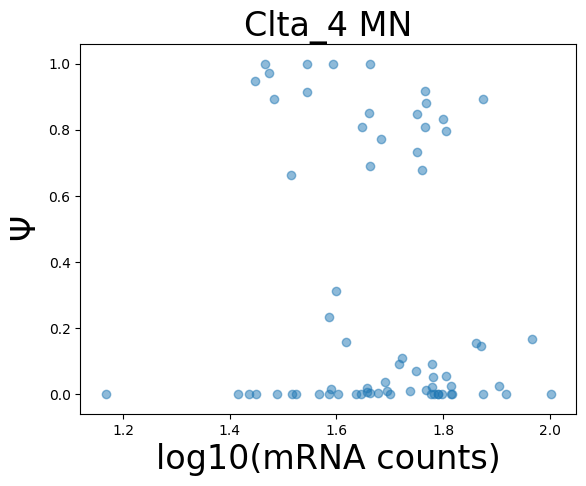

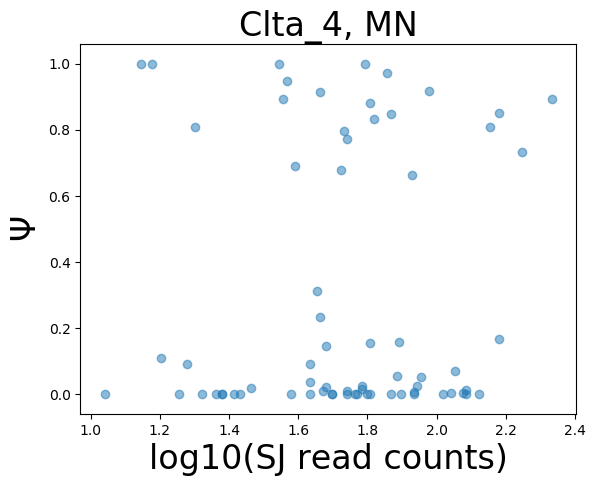

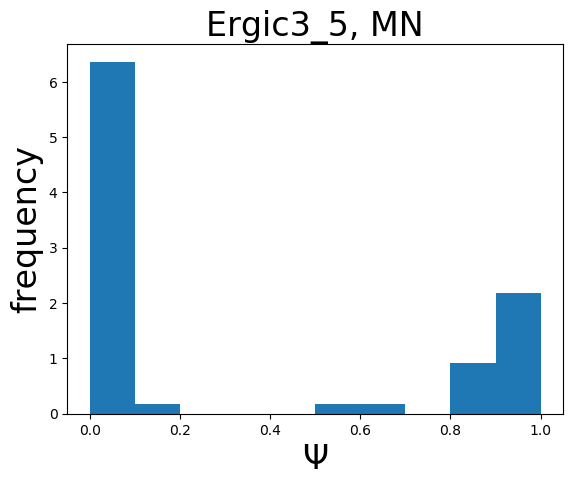

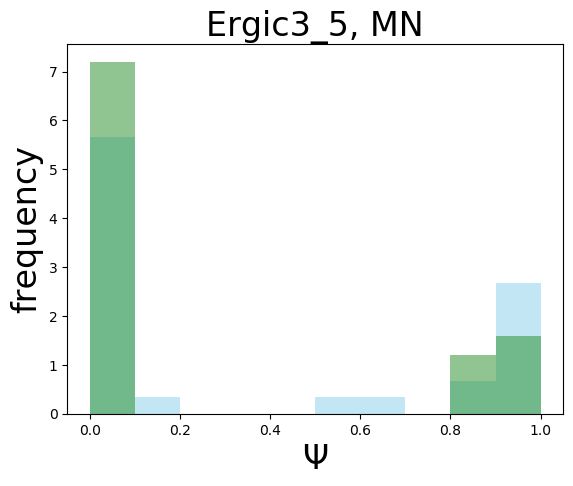

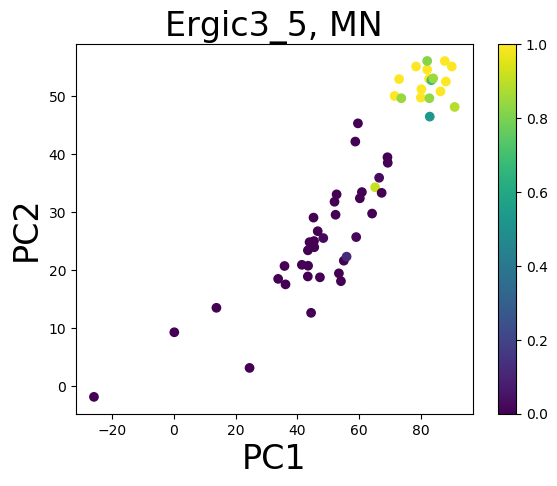

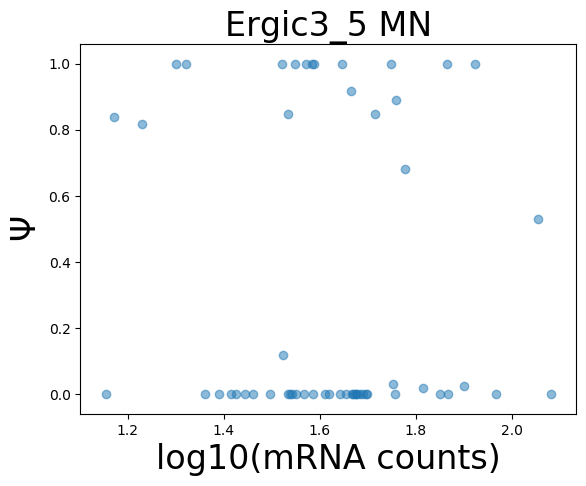

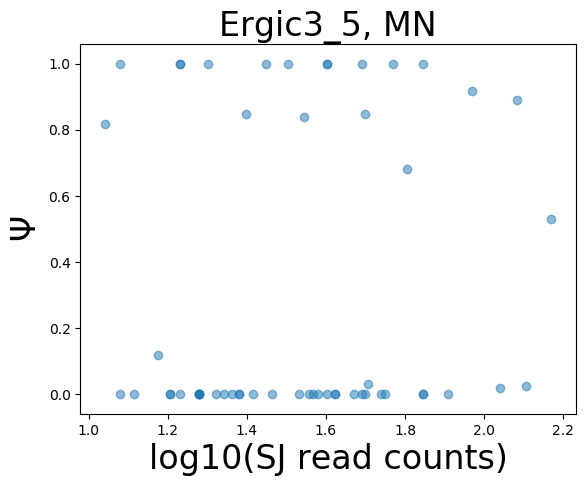

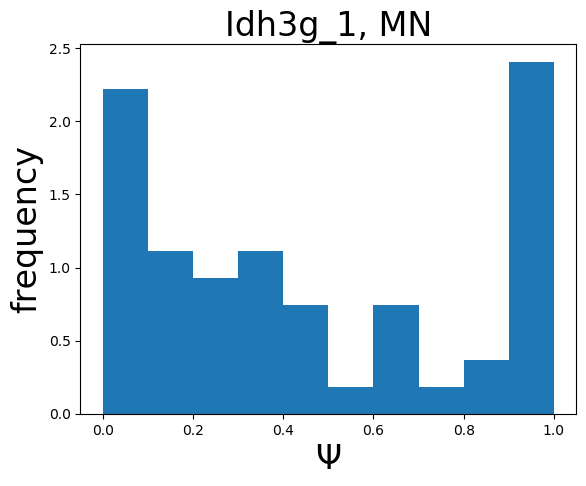

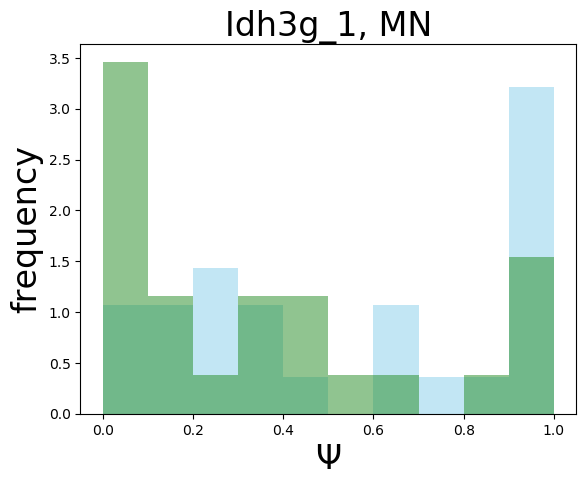

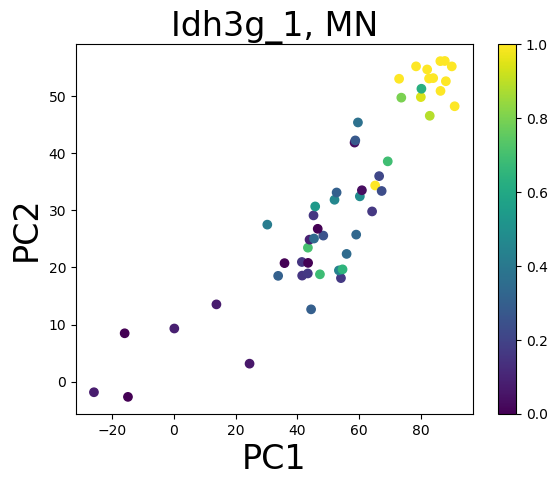

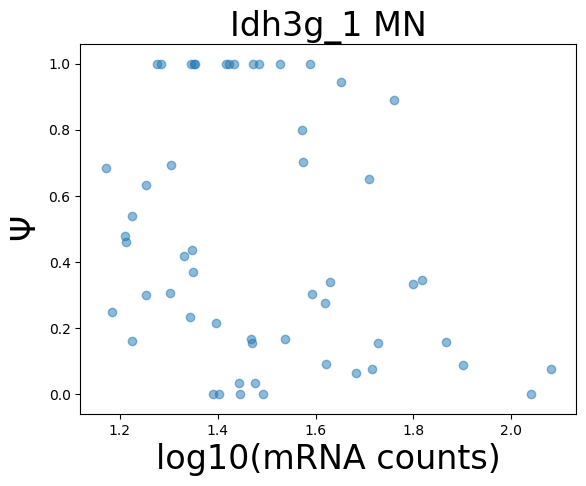

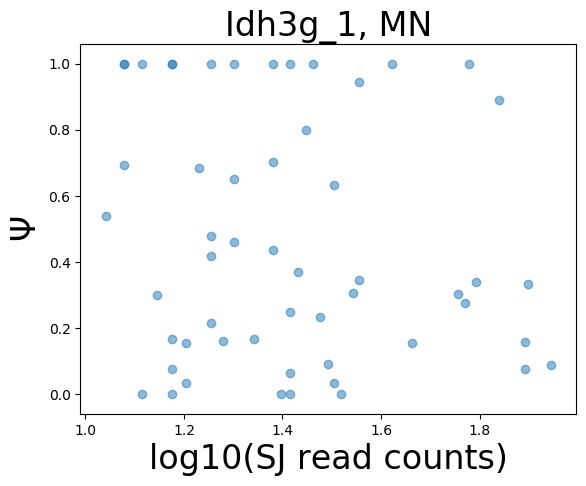

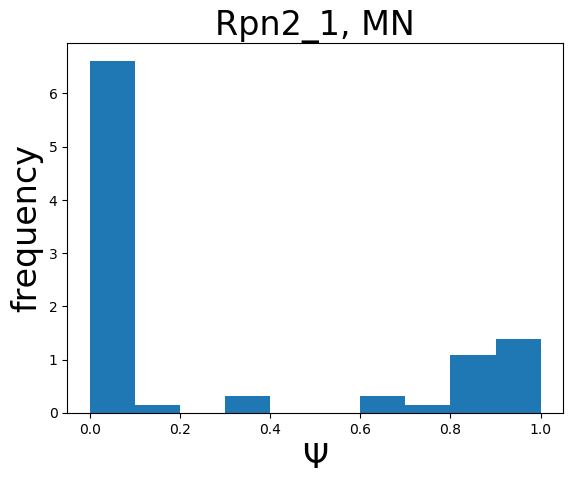

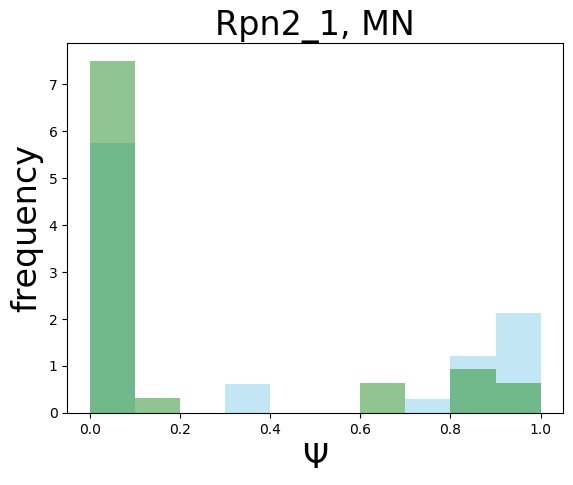

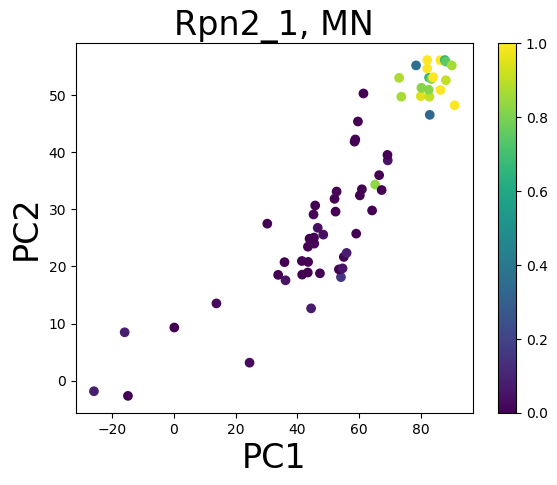

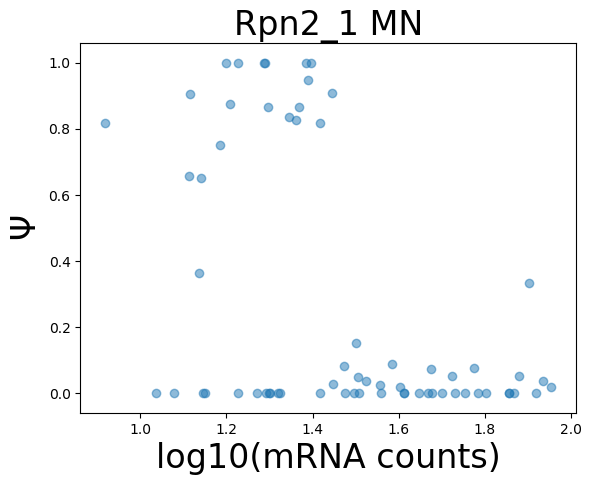

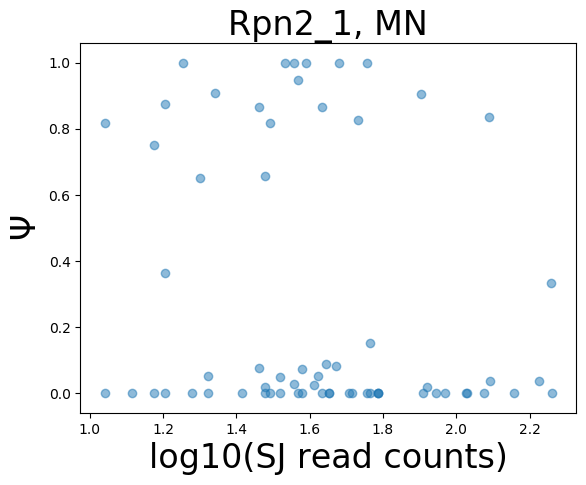

In [10]:
hartigan_multiple_test([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


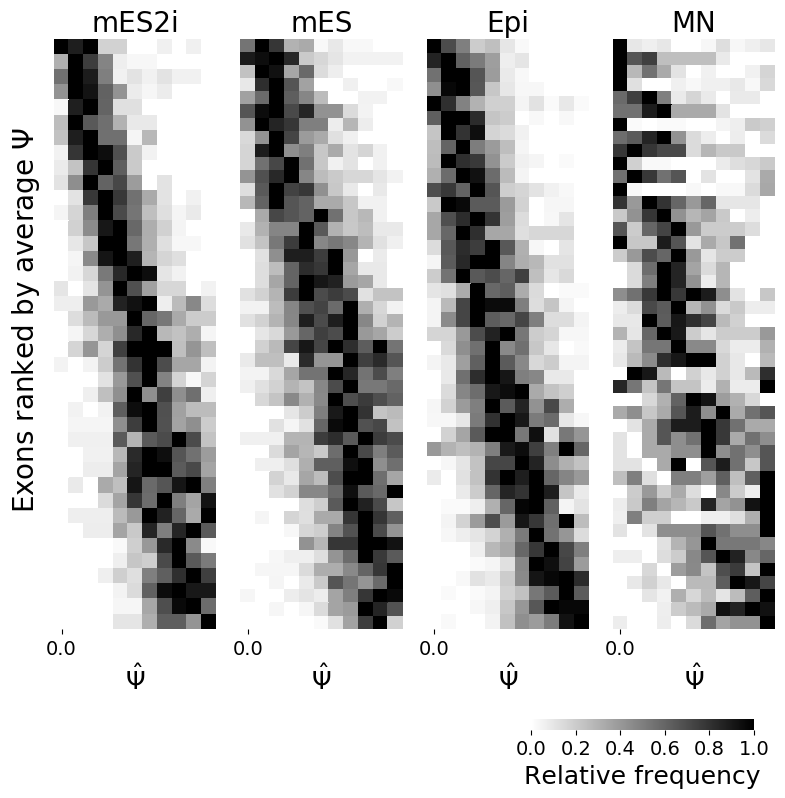

In [11]:
hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


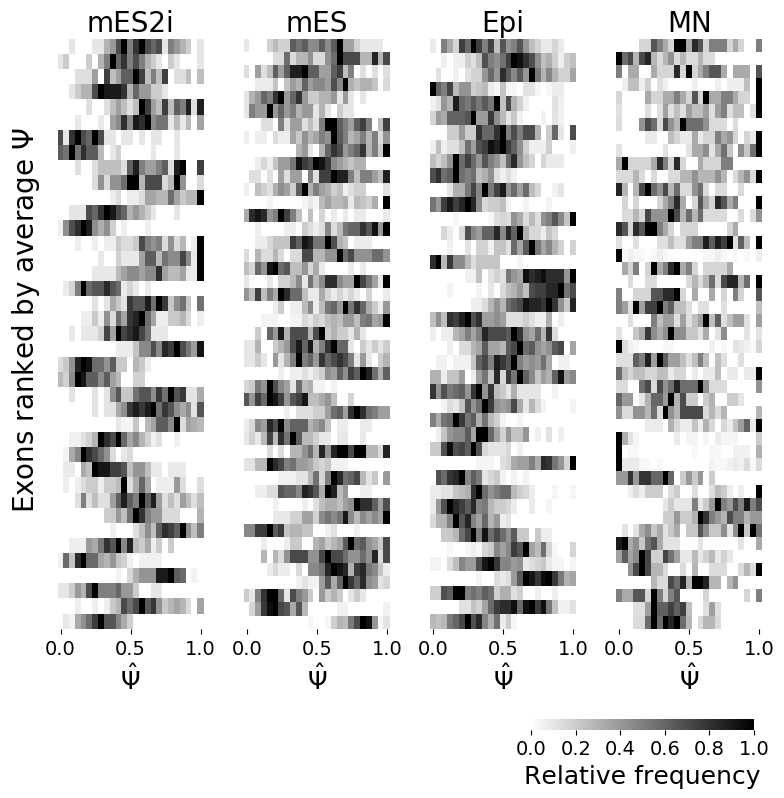

In [12]:
hist_list = [chen_ES2i_filtered[5], chen_ES_filtered[5], chen_Epi_filtered[5], chen_MN_filtered[5]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_filtered_unimodal',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

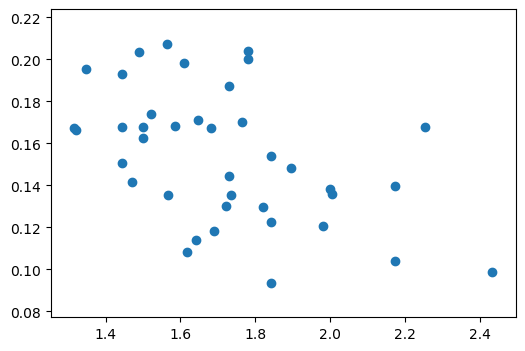

In [13]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_ES2i_filtered[5].index, chen_ES2i].mean(axis=1)),
            chen_ES2i_filtered[0].loc[chen_ES2i_filtered[5].index].std(axis=1))
plt.show()

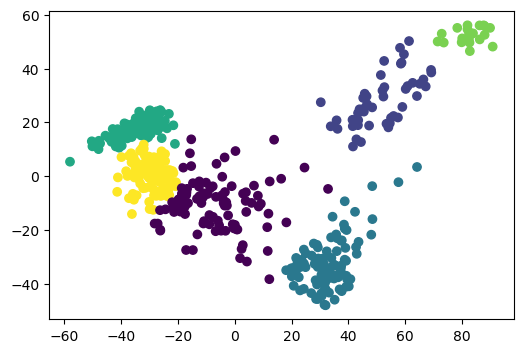

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


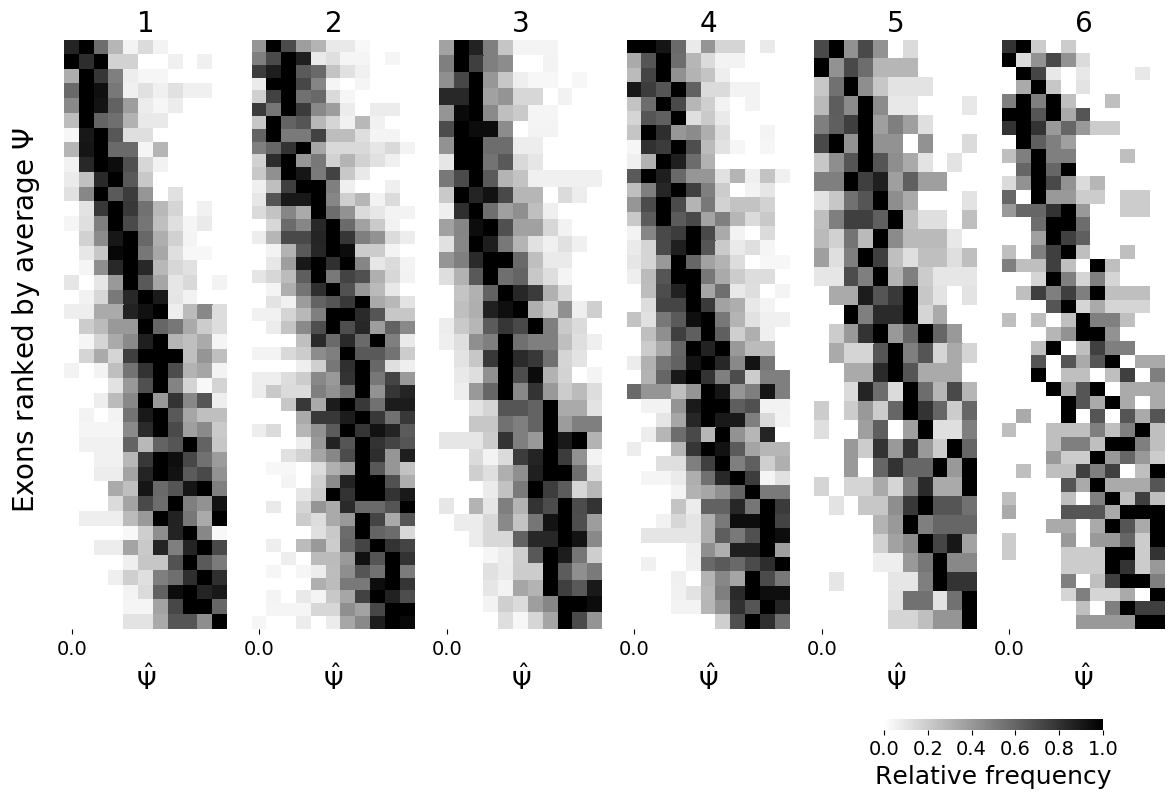

In [14]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.2, 10, 10, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    
    
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


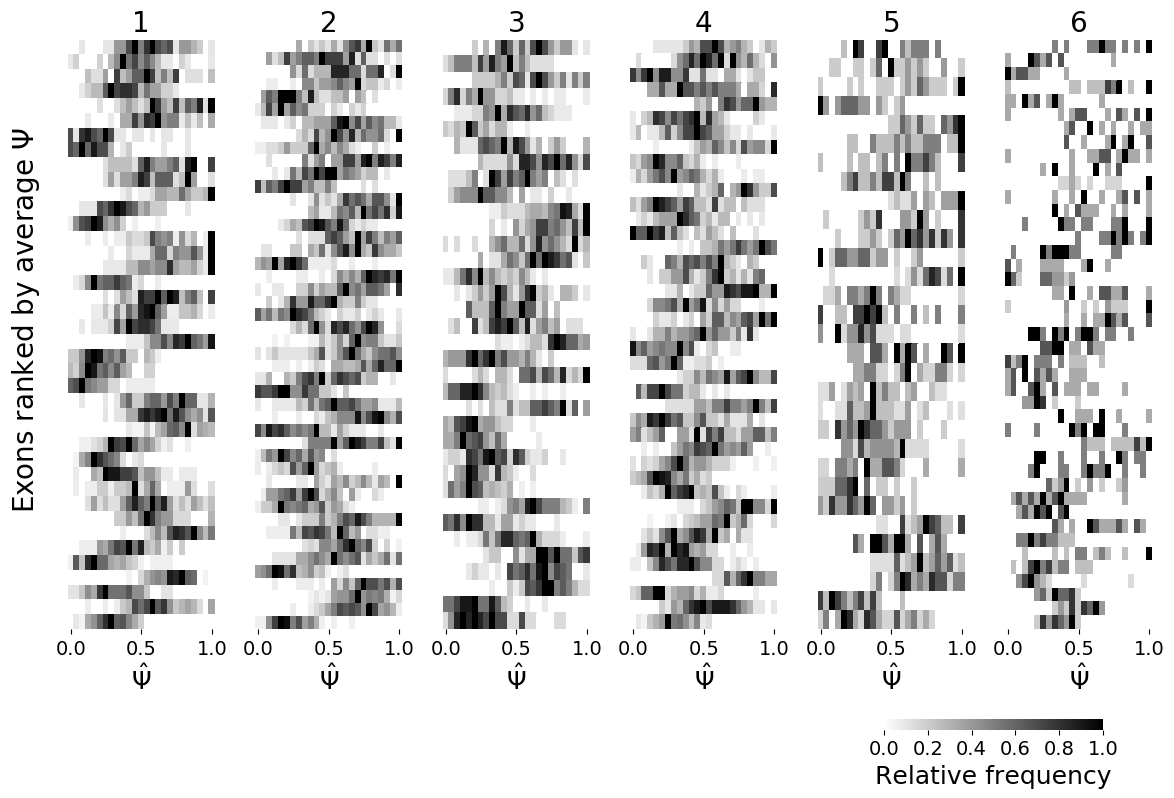

In [15]:

hist_list = [x[5] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5', '6']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

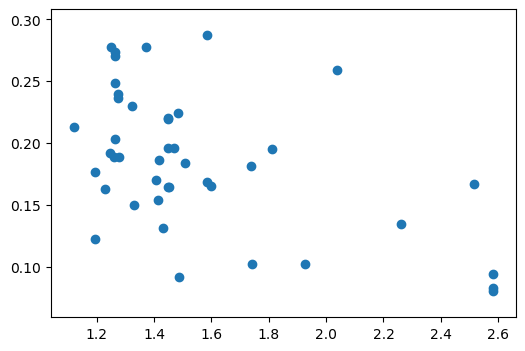

In [16]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_clust_filter[5][5].index, chen_clust_filter[5][0].columns].mean(axis=1)),
            chen_clust_filter[5][0].loc[chen_clust_filter[5][5].index].std(axis=1))
plt.show()

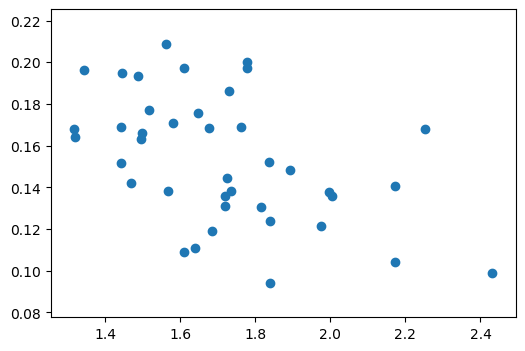

In [17]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_chen.loc[chen_clust_filter[0][5].index, chen_clust_filter[0][0].columns].mean(axis=1)),
            chen_clust_filter[0][0].loc[chen_clust_filter[0][5].index].std(axis=1))
plt.show()

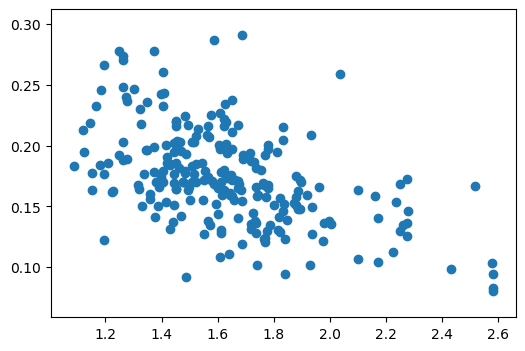

In [18]:
x_axis = []
y_axis = []

for i in range(6):
    x_axis.extend(list(np.log10(mrna_per_event_chen.loc[chen_clust_filter[i][5].index, 
                                               chen_clust_filter[i][0].columns].mean(axis=1))))
    y_axis.extend(list(chen_clust_filter[i][0].loc[chen_clust_filter[i][5].index].std(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.show()

In [33]:
kinetics_C57 = pd.read_csv('../../../data/kinetics/mES_kinetics_C57.csv', index_col=0)
kinetics_C57 = kinetics_C57.loc[~kinetics_C57.index.duplicated(keep='first')]
kinetics_CAST = pd.read_csv('../../../data/kinetics/mES_kinetics_CAST.csv', index_col=0)
kinetics_CAST = kinetics_CAST.loc[~kinetics_CAST.index.duplicated(keep='first')]

#kinetics_X = pd.read_csv('../../../data/kinetics/kinetics_X.csv', index_col=0)

In [34]:
C57_mle_name = kinetics_C57.columns[0]
C57_freq_name = kinetics_C57.columns[1]
C57_size_name = kinetics_C57.columns[2]

CAST_mle_name = kinetics_CAST.columns[0]
CAST_freq_name = kinetics_CAST.columns[1]
CAST_size_name = kinetics_CAST.columns[2]

# X_freq_name = kinetics_X.columns[1]
# X_size_name = kinetics_X.columns[2]



In [35]:
C57_freq = []
C57_size = []
# for i in kinetics_C57.index:
#     if kinetics_C57.loc[i, C57_freq_name][1:].split()[0][-1] == ',':
#         C57_freq.append(float(kinetics_C57.loc[i, C57_freq_name][1:].split()[0][:-1]))
#         print('hola')
#     else:
#         C57_freq.append(float(kinetics_C57.loc[i, C57_freq_name][1:].split()[0]))
        
#     if kinetics_C57.loc[i, C57_freq_name][1:].split()[0][-1] == ',':
#         print('hola')
#         C57_size.append(float(kinetics_C57.loc[i, C57_size_name][1:].split()[1][:-1]))
#     else:
#         C57_size.append(float(kinetics_C57.loc[i, C57_size_name][1:].split()[1]))
        
        
for i in kinetics_C57.index:
    
    kon = kinetics_C57.loc[i, C57_mle_name][1:].split()[0]
    koff = kinetics_C57.loc[i, C57_mle_name][1:].split()[1]
    ksyn = kinetics_C57.loc[i, C57_mle_name][1:].split()[2][:-1]
    
    if kon[-1] == ',':
        print(kon)
        kon = kon[:-1]
    if koff[-1] == ',':
        print(koff)
        koff = koff[:-1]
    if ksyn[-1] == ',':
        print(ksyn)
        ksyn = ksyn[:-1]
    
    C57_freq.append(float(kon))
    C57_size.append(float(ksyn)/float(koff))
    
    
CAST_freq = []
CAST_size = []
    
for i in kinetics_CAST.index:
    
    CAST_freq.append(float(kinetics_CAST.loc[i, C57_mle_name][1:].split()[0]))
    
    koff = float(kinetics_CAST.loc[i, CAST_mle_name][1:].split()[1])
    ksyn = float(kinetics_CAST.loc[i, CAST_mle_name][1:].split()[2][:-1])
    
    CAST_size.append(ksyn/koff)
        

    

# for i in kinetics_CAST.index:
#     CAST_freq.append(float(kinetics_CAST.loc[i, CAST_freq_name][1:].split()[0]))
#     CAST_size.append(float(kinetics_CAST.loc[i, CAST_size_name][1:].split()[1]))
    
# X_freq = []
# X_size = []
# for i in kinetics_X.index:
#     X_freq.append(float(kinetics_X.loc[i, X_freq_name][1:].split()[0]))
#     X_size.append(float(kinetics_X.loc[i, X_size_name][1:].split()[1]))

1.85595906,
47.25645625,


In [39]:
C57_kinetics = pd.DataFrame()
C57_kinetics['gene'] = kinetics_C57.index
C57_kinetics['C57_frequency'] = C57_freq
C57_kinetics['C57_size'] = C57_size
C57_kinetics = C57_kinetics.set_index('gene')

CAST_kinetics = pd.DataFrame()
CAST_kinetics['gene'] = kinetics_CAST.index
CAST_kinetics['CAST_frequency'] = CAST_freq
CAST_kinetics['CAST_size'] = CAST_size
CAST_kinetics = CAST_kinetics.set_index('gene')

# X_kinetics = pd.DataFrame()
# X_kinetics['gene'] = kinetics_X.index
# X_kinetics['X_frequency'] = X_freq
# X_kinetics['X_size'] = X_size
# X_kinetics = X_kinetics.set_index('gene')


In [40]:
kinetic_table = pd.concat([CAST_kinetics, C57_kinetics], axis=1)

In [41]:
# kinetic_table[['C57_frequency', 'CAST_frequency']].mean(axis=1)

In [42]:
frequency_list = []
psi_std = []
for i in chen_PSI.index:
    if i.split('_')[0] in kinetic_table.index:
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_std.append(chen_PSI.loc[i].std())

In [44]:
size_list = []
psi_std = []
for i in chen_PSI.index:
    if i.split('_')[0] in kinetic_table.index:
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        psi_std.append(chen_PSI.loc[i].std())

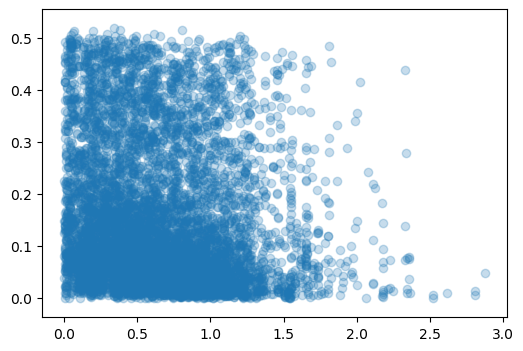

In [45]:
figsize(6, 4)
plt.scatter(np.log10(np.array(size_list)), psi_std, alpha = 0.25)
plt.show()

In [46]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI[chen_ES2i], chen_mrna_counts[chen_ES2i], min_unimodal = 0.2)

In [47]:
frequency_list = []
psi_binary = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append(np.abs(0.5 - chen_PSI[chen_ES2i].loc[i] >= 0.49).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))

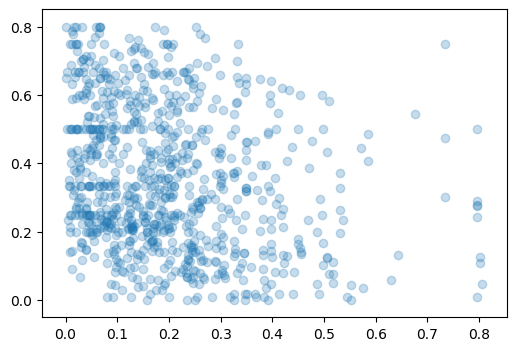

In [48]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_binary, alpha = 0.25)
plt.show()

In [49]:
size_list = []
frequency_list = []
psi_binary = []
exon_lista = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        exon_lista.append(i)
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append((np.abs(0.5 - chen_PSI[chen_ES2i].loc[i]) >= 0.45).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))

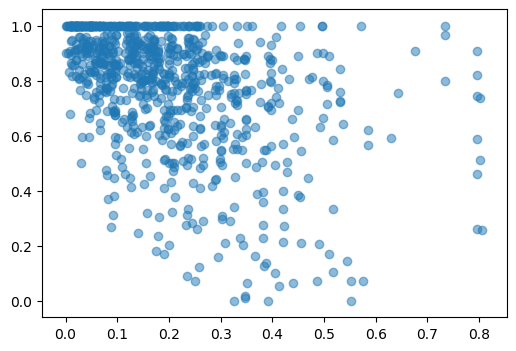

In [50]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_binary,alpha = 0.5)
plt.show()

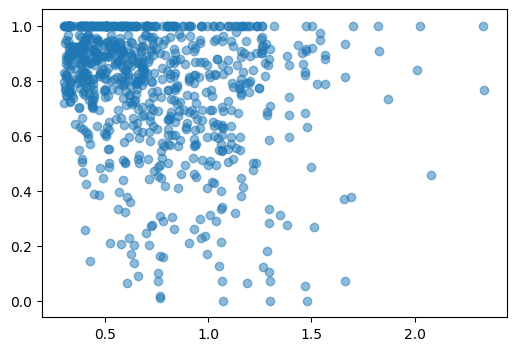

In [51]:
figsize(6, 4)
plt.scatter(np.log10(np.array(size_list)+1), psi_binary, alpha = 0.5)
plt.show()

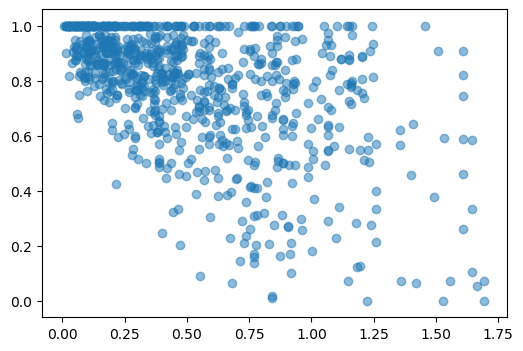

In [52]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list)*np.array(frequency_list))+1), psi_binary, alpha = 0.5)
plt.show()

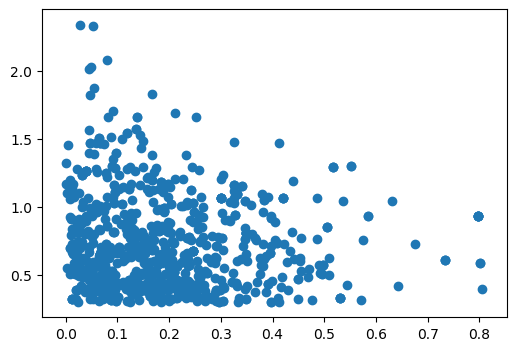

In [53]:
plt.scatter(np.log10(np.array(frequency_list)+1), np.log10(np.array(size_list)+1))
plt.show()

In [54]:
size_list = []
frequency_list = []
psi_binary = []
exon_lista = []
psi_std = []
psi_mean = []
for i in chen_int_exons:
    if i.split('_')[0] in kinetic_table.index:
        exon_lista.append(i)
        size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
        frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
        psi_binary.append((np.abs(0.5 - chen_PSI[chen_ES2i].loc[i]) >= 0.45).sum() / np.sum(~chen_PSI[chen_ES2i].loc[i].isna()))
        psi_std.append(chen_PSI[chen_ES2i].loc[i].std())
        psi_mean.append(chen_PSI[chen_ES2i].loc[i].mean())

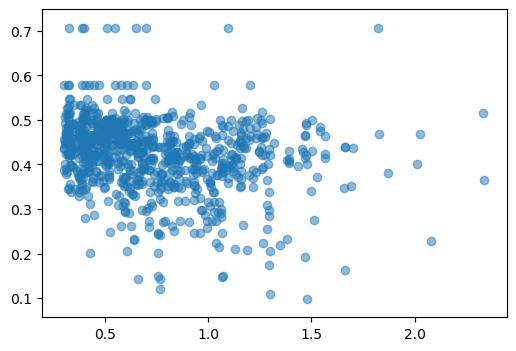

In [55]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list))+1), psi_std, alpha = 0.5)
plt.show()

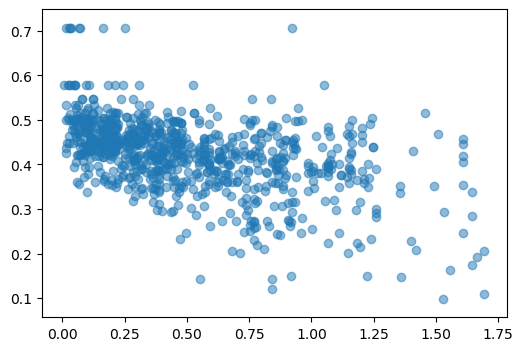

In [56]:
figsize(6, 4)
plt.scatter(np.log10((np.array(size_list)*np.array(frequency_list))+1), psi_std, alpha = 0.5)
plt.show()

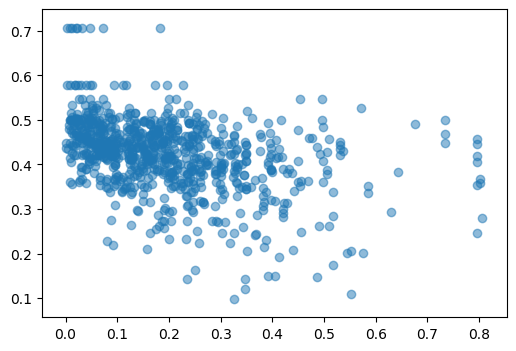

In [57]:
figsize(6, 4)
plt.scatter(np.log10(np.array(frequency_list)+1), psi_std, alpha = 0.5)
plt.show()

In [58]:
burst_psi = pd.DataFrame()
burst_psi['exon'] = exon_lista
burst_psi['frequency'] = frequency_list
burst_psi['size'] = size_list
burst_psi['psi_std'] = psi_std
burst_psi['psi_mean'] = psi_mean
burst_psi['psi_binary'] = psi_binary
burst_psi = burst_psi.set_index('exon')

In [59]:
bursty=burst_psi.index[(burst_psi.frequency <= burst_psi.frequency.median()) & (burst_psi['size'] >= burst_psi['size'].median())]
rapid=burst_psi.index[(burst_psi.frequency >= burst_psi.frequency.median()) & (burst_psi['size'] <= burst_psi['size'].median())]
massive=burst_psi.index[(burst_psi.frequency >= burst_psi.frequency.median()) & (burst_psi['size'] >= burst_psi['size'].median())]
tiny=burst_psi.index[(burst_psi.frequency <= burst_psi.frequency.median()) & (burst_psi['size'] <= burst_psi['size'].median())]

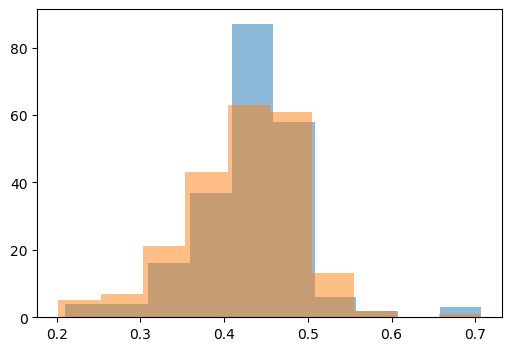

In [60]:
plt.hist(burst_psi.loc[bursty, 'psi_std'], alpha=0.5)
plt.hist(burst_psi.loc[rapid, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[massive, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[tiny, 'psi_std'], alpha=0.5)

plt.show()

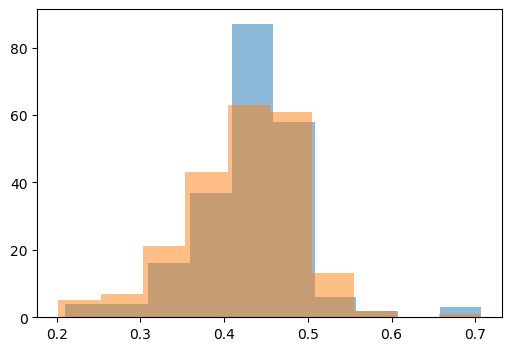

In [61]:
plt.hist(burst_psi.loc[bursty, 'psi_std'], alpha=0.5)
plt.hist(burst_psi.loc[rapid, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[massive, 'psi_std'], alpha=0.5)
# plt.hist(burst_psi.loc[tiny, 'psi_std'], alpha=0.5)

plt.show()

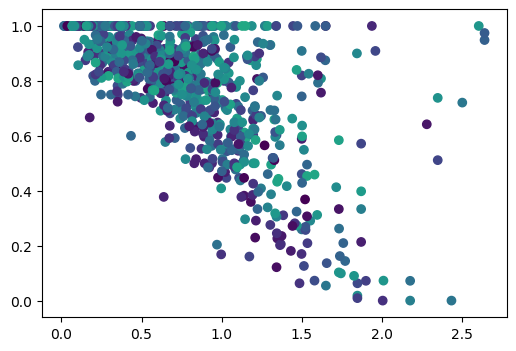

In [62]:
plt.scatter(np.log10(mrna_per_event_chen.loc[burst_psi.index, chen_ES2i].mean(axis=1)+1),
            burst_psi['psi_binary'], c = np.abs(0.5-burst_psi['psi_mean']), cmap=cm.viridis, vmin=0, vmax=0.5)


In [63]:
top_expressed = mrna_per_event_chen.loc[burst_psi.index, chen_ES2i].mean(axis=1).sort_values()[-100:].index

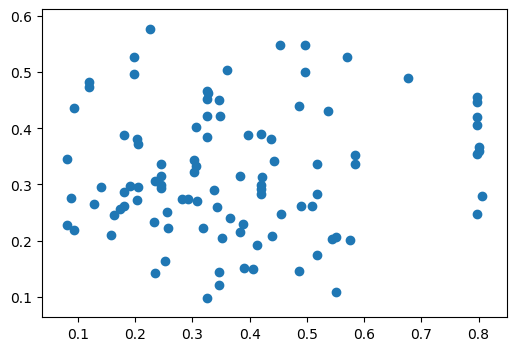

In [64]:
plt.scatter(np.log10(burst_psi.loc[top_expressed, 'frequency']+1), burst_psi.loc[top_expressed, 'psi_std'])
plt.show()

In [65]:
def test_burst(PSI_tab, mrna_counts, mrna_per_event, subpop, kinetic_table,  min_unimodal = 0.2):

    int_genes, int_exons = spu.get_int_events(PSI_tab[subpop], mrna_counts[subpop], min_unimodal = min_unimodal)

    size_list = []
    frequency_list = []
    psi_binary = []
    exon_lista = []
    psi_std = []
    psi_mean = []
    for i in int_exons:
        if i.split('_')[0] in kinetic_table.index:
            exon_lista.append(i)
            size_list.append(kinetic_table.loc[i.split('_')[0], ['C57_size', 'CAST_size']].mean())
            frequency_list.append(kinetic_table.loc[i.split('_')[0], ['C57_frequency', 'CAST_frequency']].mean())
            psi_binary.append((np.abs(0.5 - PSI_tab[subpop].loc[i]) >= 0.45).sum() / np.sum(~PSI_tab[subpop].loc[i].isna()))
            psi_std.append(PSI_tab[subpop].loc[i].std())
            psi_mean.append(PSI_tab[subpop].loc[i].mean())
        

    burst_psi = pd.DataFrame()
    burst_psi['exon'] = exon_lista
    burst_psi['frequency'] = frequency_list
    burst_psi['size'] = size_list
    burst_psi['psi_std'] = psi_std
    burst_psi['psi_mean'] = psi_mean
    burst_psi['psi_binary'] = psi_binary
    burst_psi = burst_psi.set_index('exon')

    burst_expression =  mrna_per_event.loc[burst_psi.index, subpop].mean(axis=1)
    
    burst_psi['mean_expression'] = burst_expression
    
    low_exp = burst_expression.index[burst_expression <= burst_expression.quantile(0.25)]
    med_exp = burst_expression.index[(burst_expression > burst_expression.quantile(0.25)) & ((burst_expression <= burst_expression.quantile(0.5)))]
    med_high_exp = burst_expression.index[(burst_expression > burst_expression.quantile(0.5)) & ((burst_expression <= burst_expression.quantile(0.75)))]
    high_exp = burst_expression.index[burst_expression > burst_expression.quantile(0.75)]
    
    freq_cor_bin = []
    freq_cor_std = []
    
    size_cor_bin = []
    size_cor_std = []
    
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'frequency']+1), burst_psi.loc[low_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'frequency']+1), burst_psi.loc[med_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'frequency']+1), burst_psi.loc[med_high_exp, 'psi_binary']))
    freq_cor_bin.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'frequency']+1), burst_psi.loc[high_exp, 'psi_binary']))
    
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'frequency']+1), burst_psi.loc[low_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'frequency']+1), burst_psi.loc[med_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'frequency']+1), burst_psi.loc[med_high_exp, 'psi_std']))
    freq_cor_std.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'frequency']+1), burst_psi.loc[high_exp, 'psi_std']))
    
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'size']+1), burst_psi.loc[med_high_exp, 'psi_binary']))
    size_cor_bin.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_binary']))
    
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[med_high_exp, 'size']+1), burst_psi.loc[med_high_exp, 'psi_std']))
    size_cor_std.append(test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_std']))
    
    return freq_cor_bin, freq_cor_std, size_cor_bin, size_cor_std, burst_psi, low_exp, med_exp, med_high_exp, high_exp


In [66]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
def test_pearson(x, y):
    x_t = x.loc[x.dropna().index].index
    y_t = y.loc[y.dropna().index].index
    
    common = [z for z in x_t if z in y_t]
    
    return pearsonr(x.loc[common], y.loc[common])

In [67]:
ES2i_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_ES2i, kinetic_table,  min_unimodal = 0.2)
# ES_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_ES, kinetic_table,  min_unimodal = 0.2)
# Epi_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_Epi, kinetic_table,  min_unimodal = 0.2)
# MN_kinetics = test_burst(chen_PSI, chen_mrna_counts, mrna_per_event_chen, chen_MN, kinetic_table,  min_unimodal = 0.2)

In [68]:
freq_binary_p = [x[1] for x in ES2i_kinetics[1]]

In [69]:
multipletests(freq_binary_p, method='fdr_bh')

(array([ True, False, False, False]),
 array([0.02980834, 0.05350094, 0.94307868, 0.57623998]),
 0.012741455098566168,
 0.0125)

In [70]:
burst_psi_ES2i = ES2i_kinetics[4]
low_exp = ES2i_kinetics[5]
med_exp = ES2i_kinetics[6]
med_high_exp = ES2i_kinetics[7]
high_exp = ES2i_kinetics[8]

In [210]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from random import sample
from scipy.special import logit


In [223]:
q75 = burst_psi_ES2i.mean_expression.quantile(0.05)
q95 = burst_psi_ES2i.mean_expression.quantile(0.95)
burst_psi_selected = burst_psi_ES2i.loc[(burst_psi_ES2i.mean_expression >= q75) & (burst_psi_ES2i.mean_expression <= q95)]
psi_corrected = []
for x in burst_psi_selected.psi_binary:
    if x <= 0.01:
        psi_corrected.append(0.01)
    elif x >= 0.99:
        psi_corrected.append(0.99)
    else:
        psi_corrected.append(x)
        
burst_psi_selected['psi_corrected'] = list(logit(np.array(psi_corrected)))
# burst_psi_selected.loc[train, 'psi_corrected']

load_data.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [212]:
train = sample(list(burst_psi_selected.index), int(burst_psi_selected.shape[0]*0.8))
test = [x for x in burst_psi_selected.index if x not in train]

In [218]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['frequency', 'size', 'mean_expression']], burst_psi_selected.loc[train, 'psi_corrected'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# LR.predict(burst_psi_selected.loc[test, ['frequency', 'size']])

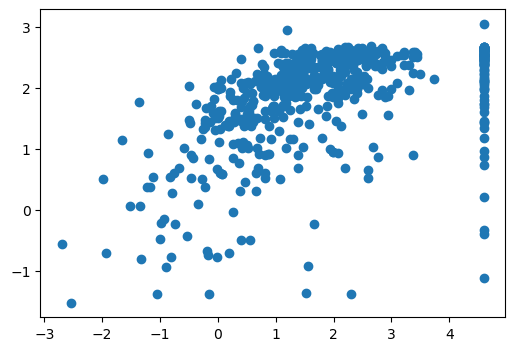

In [220]:
plt.scatter(burst_psi_selected.loc[train, 'psi_corrected'], LR.predict(burst_psi_selected.loc[train, ['frequency', 'size', 'mean_expression']]))
plt.show()

In [221]:
LR.coef_

array([-0.20176222,  0.00233626, -0.10008272])

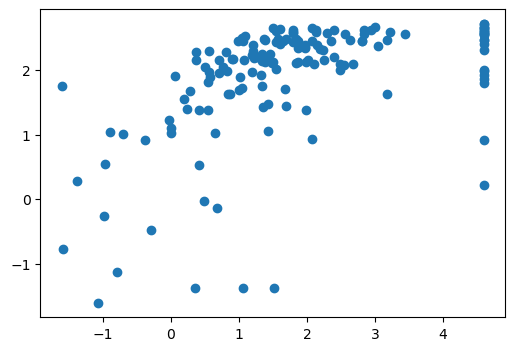

In [222]:
plt.scatter(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['frequency', 'size', 'mean_expression']]))
plt.show()

In [224]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['frequency', 'size']], burst_psi_selected.loc[train, 'psi_corrected'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

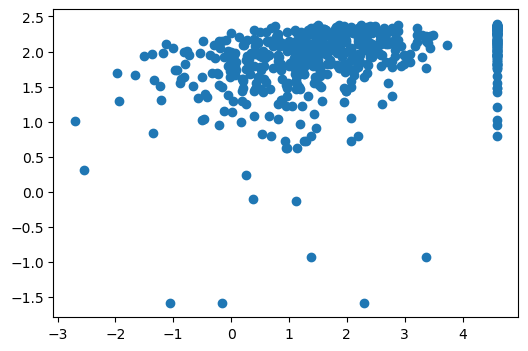

In [225]:
plt.scatter(burst_psi_selected.loc[train, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[train, ['frequency', 'size']]))
plt.show()

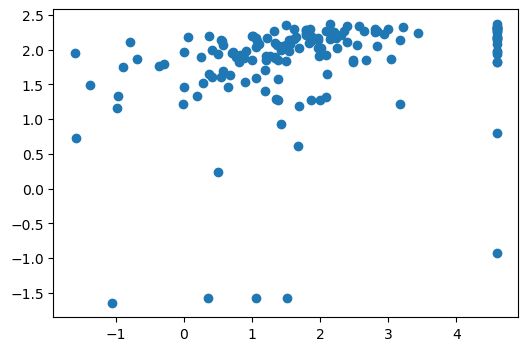

In [226]:
plt.scatter(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['frequency', 'size']]))
plt.show()

In [227]:
LR.coef_

array([-0.75153143, -0.00648774])

In [228]:
from sklearn.metrics import mean_squared_error

In [337]:
q75 = burst_psi_ES2i.mean_expression.quantile(0.75)
q95 = burst_psi_ES2i.mean_expression.quantile(0.95)
burst_psi_selected = burst_psi_ES2i.loc[(burst_psi_ES2i.mean_expression >= q75) & (burst_psi_ES2i.mean_expression <= q95)]
psi_corrected = []
for x in burst_psi_selected.psi_binary:
    if x <= 0.01:
        psi_corrected.append(0.01)
    elif x >= 0.99:
        psi_corrected.append(0.99)
    else:
        psi_corrected.append(x)
        
burst_psi_selected['psi_corrected'] = list(logit(np.array(psi_corrected)))
# burst_psi_selected.loc[train, 'psi_corrected']
train = sample(list(burst_psi_selected.index), int(burst_psi_selected.shape[0]*0.8))
test = [x for x in burst_psi_selected.index if x not in train]

load_data.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from matplotlib.gridspec import GridSpec


In [338]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['frequency', 'size']], burst_psi_selected.loc[train, 'psi_corrected'])

mean_squared_error(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['frequency', 'size']]))

2.50108849441851

In [339]:
LR.coef_

array([0.02447905, 0.01894141])

In [342]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['frequency', 'size', 'mean_expression']], burst_psi_selected.loc[train, 'psi_corrected'])

mean_squared_error(burst_psi_selected.loc[train, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[train, ['frequency', 'size', 'mean_expression']]))

2.3713620848765395

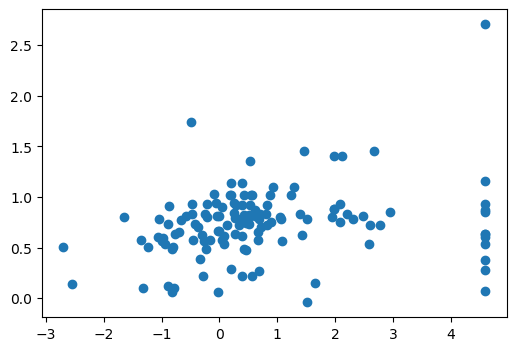

In [343]:
plt.scatter(burst_psi_selected.loc[train, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[train, ['frequency', 'size', 'mean_expression']]))

Text(0, 0.5, 'regression coefficient')

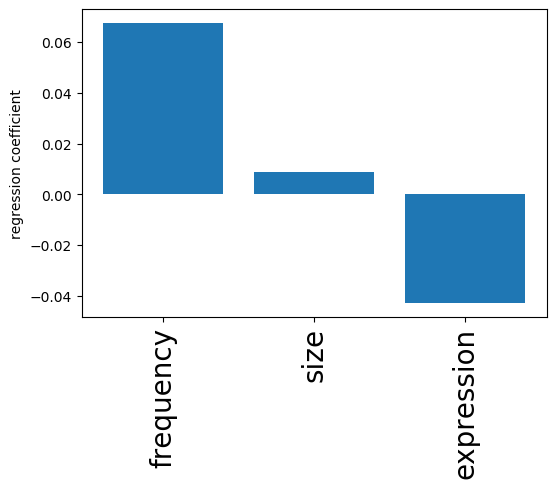

In [328]:
plt.bar([0, 1, 2], LR.coef_)
plt.xticks([0, 1, 2], ['frequency', 'size', 'expression'], fontsize=20, rotation='vertical')    
plt.ylabel('regression coefficient')


In [329]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['mean_expression']], burst_psi_selected.loc[train, 'psi_corrected'])

mean_squared_error(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['mean_expression']]))

1.7893193249938253

In [330]:
LR.coef_

array([-0.03738592])

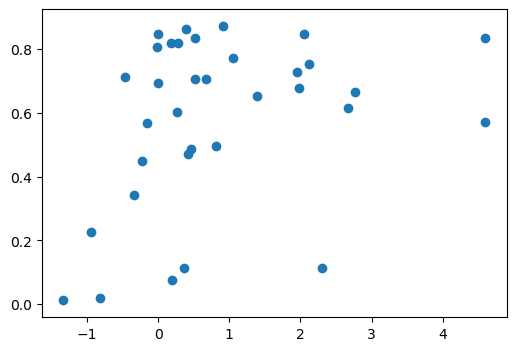

In [331]:
plt.scatter(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['mean_expression']]))

In [310]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['frequency']], burst_psi_selected.loc[train, 'psi_corrected'])

mean_squared_error(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['frequency']]))

1.6590008793539262

In [311]:
LR = LinearRegression()
LR.fit(burst_psi_selected.loc[train, ['size']], burst_psi_selected.loc[train, 'psi_corrected'])

mean_squared_error(burst_psi_selected.loc[test, 'psi_corrected'], 
            LR.predict(burst_psi_selected.loc[test, ['size']]))

1.6128752938866278

In [378]:
q75 = burst_psi_ES2i.mean_expression.quantile(0.75)
q95 = burst_psi_ES2i.mean_expression.quantile(0.95)
burst_psi_selected = burst_psi_ES2i.loc[(burst_psi_ES2i.mean_expression >= q75) & (burst_psi_ES2i.mean_expression <= q95)]
psi_corrected = []
for x in burst_psi_selected.psi_binary:
    if x <= 0.01:
        psi_corrected.append(0.01)
    elif x >= 0.99:
        psi_corrected.append(0.99)
    else:
        psi_corrected.append(x)
        
burst_psi_selected['psi_corrected'] = list(logit(np.array(psi_corrected)))
# burst_psi_selected.loc[train, 'psi_corrected']
# train = sample(list(burst_psi_selected.index), int(burst_psi_selected.shape[0]*0.8))
# test = [x for x in burst_psi_selected.index if x not in train]

load_data.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from matplotlib.gridspec import GridSpec


2.403867903574867


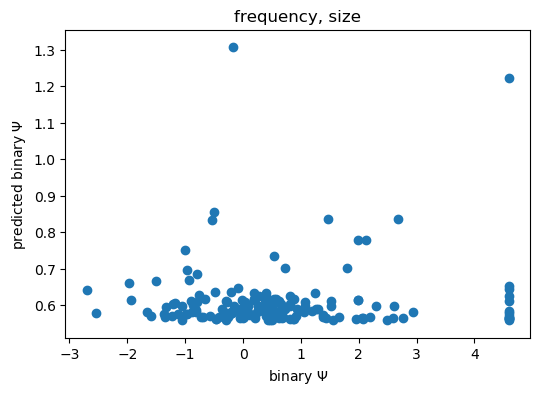

(0.057904632894036114, 0.4573022783352694)


In [402]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['frequency', 'size']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size']]))

plt.xlabel('binary $\Psi$')
plt.ylabel('predicted binary $\Psi$')
plt.title('frequency, size')
plt.show()
print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size']])))

In [386]:
LR.coef_

array([8.30220015e-05, 6.37554944e-03])

2.269567275915497


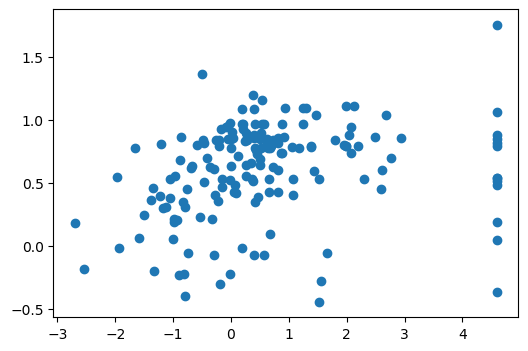

(0.24296949982643354, 0.0015571177240457706)


In [404]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['frequency', 'size', 'mean_expression']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size', 'mean_expression']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size', 'mean_expression']]))
plt.show()
print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'size', 'mean_expression']])))

Text(0, 0.5, 'regression coefficient')

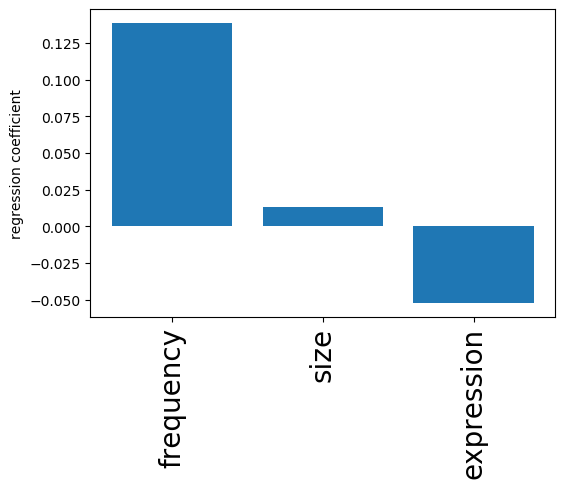

In [405]:
plt.bar([0, 1, 2], LR.coef_)
plt.xticks([0, 1, 2], ['frequency', 'size', 'expression'], fontsize=20, rotation='vertical')    
plt.ylabel('regression coefficient')


2.3068264396760307


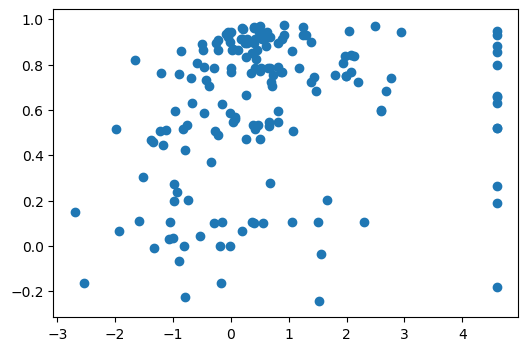

(0.208773742438003, 0.006777371221317582)


In [406]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['mean_expression']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['mean_expression']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['mean_expression']]))
plt.show()
print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['mean_expression']])))

2.411561737723372


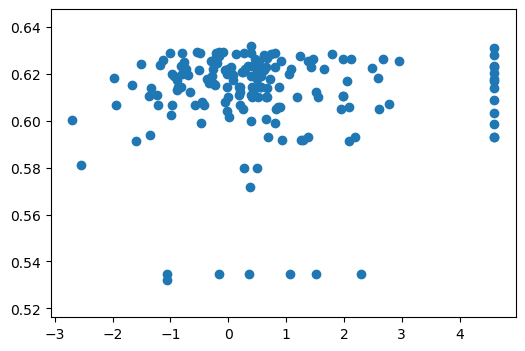

(0.012769961801604295, 0.8698953107448938)


In [407]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['frequency']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency']]))
plt.show()
print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency']])))

2.4038679108627683


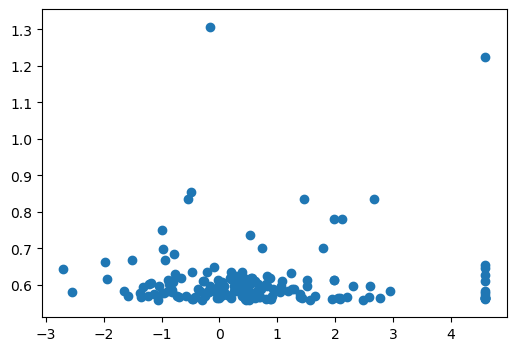

(0.05790460680307599, 0.45730248140125734)


In [408]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['size']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size']]))
plt.show()

print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size']])))

2.299245273248588


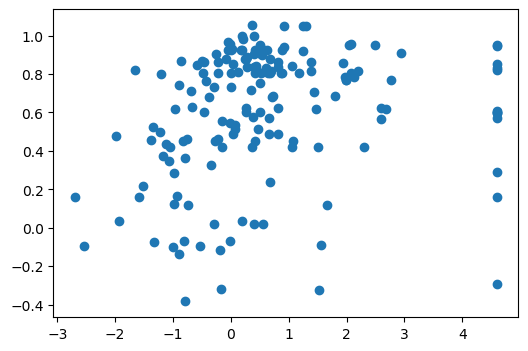

(0.2161703909425876, 0.00501904872619193)


In [409]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['frequency', 'mean_expression']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'mean_expression']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'mean_expression']]))
plt.show()

print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['frequency', 'mean_expression']])))

In [394]:
LR.coef_

array([ 0.08703149, -0.04649279])

2.287198915147073


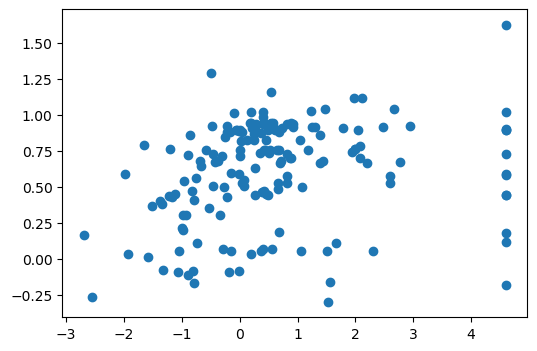

(0.22742927500861235, 0.0031186615237331614)


In [410]:
LR = LinearRegression()
LR.fit(burst_psi_selected[['size', 'mean_expression']], burst_psi_selected['psi_corrected'])

print(mean_squared_error(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size', 'mean_expression']])))
plt.scatter(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size', 'mean_expression']]))
plt.show()

print(pearsonr(burst_psi_selected['psi_corrected'], 
            LR.predict(burst_psi_selected[['size', 'mean_expression']])))

Text(0, 0.5, 'MSE')

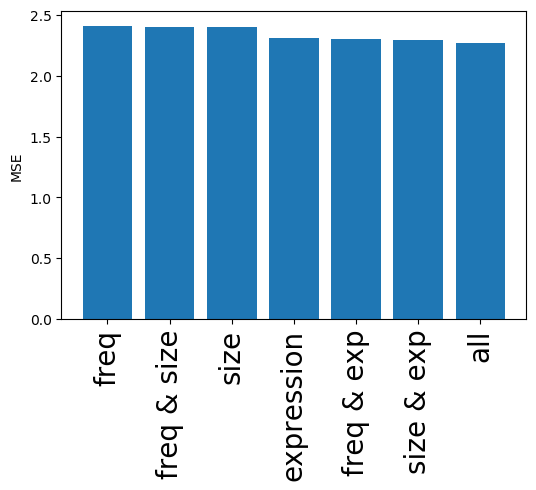

In [401]:
plt.bar([0, 1, 2, 3, 4, 5, 6], [2.41, 2.40, 2.40, 2.31, 2.3, 2.29, 2.27])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['freq', 'freq & size', 'size', 'expression', 'freq & exp', 'size & exp', 'all'], 
           fontsize=20, rotation='vertical')    
plt.ylabel('MSE')


Text(0, 0.5, 'Pearson r')

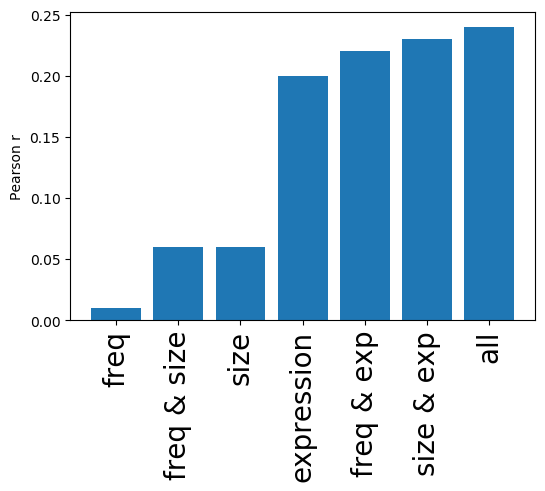

In [412]:
plt.bar([0, 1, 2, 3, 4, 5, 6], [0.01, 0.06, 0.06, 0.20, 0.22, 0.23, 0.24])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['freq', 'freq & size', 'size', 'expression', 'freq & exp', 'size & exp', 'all'], 
           fontsize=20, rotation='vertical')    
plt.ylabel('Pearson r')


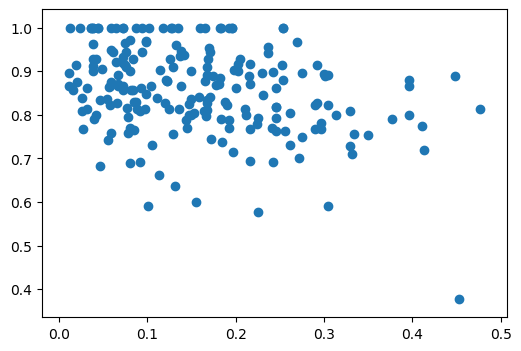

In [71]:
plt.scatter(np.log10(burst_psi_ES2i.loc[med_exp, 'frequency']+1), burst_psi_ES2i.loc[med_exp, 'psi_binary'])
plt.show()

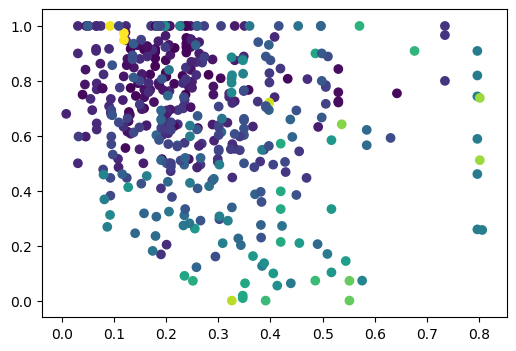

In [72]:
# burst_psi_ES2i.mean_expression
plt.scatter(np.log10(burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'frequency']+1), 
            burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'psi_binary'],
           c = np.log10(burst_psi_ES2i.loc[list(med_high_exp) + list(high_exp), 'mean_expression']), cmap=cm.viridis)
plt.show()

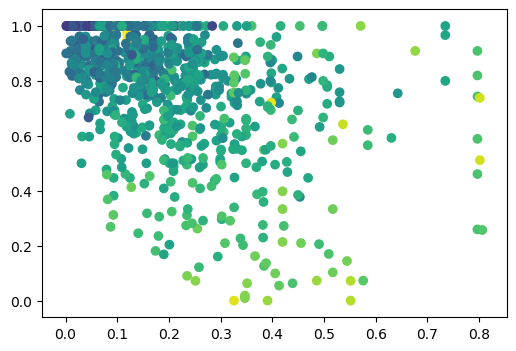

In [73]:
plt.scatter(np.log10(burst_psi_ES2i['frequency']+1), burst_psi_ES2i['psi_binary'],
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.show()

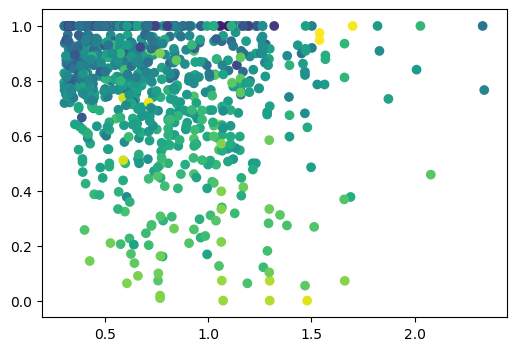

In [74]:
plt.scatter(np.log10(burst_psi_ES2i['size']+1), burst_psi_ES2i['psi_binary'],
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.show()

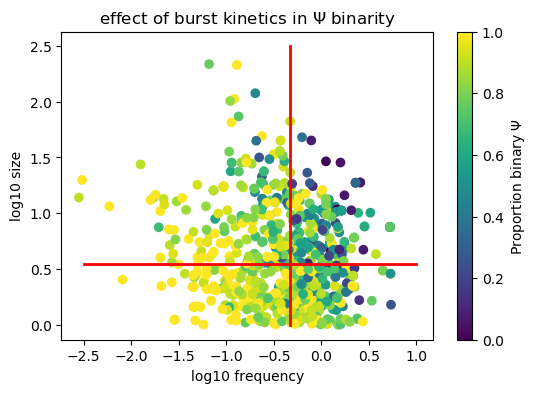

In [261]:
sc = plt.scatter(np.log10(burst_psi_ES2i['frequency']), np.log10(burst_psi_ES2i['size']),
           c = burst_psi_ES2i['psi_binary'], cmap=cm.viridis, vmin=0, vmax=1)
plt.colorbar(sc, label='Proportion binary $\Psi$')
freq_med = burst_psi_ES2i['frequency'].median()
size_med = burst_psi_ES2i['size'].median()
plt.plot([np.log10(freq_med), np.log10(freq_med)], [0, 2.5], c='red', linewidth=2)
plt.plot([-2.5, 1], [np.log10(size_med), np.log10(size_med)], c='red', linewidth=2)
plt.xlabel('log10 frequency')
plt.ylabel('log10 size')
plt.title('effect of burst kinetics in $\Psi$ binarity')
plt.show()

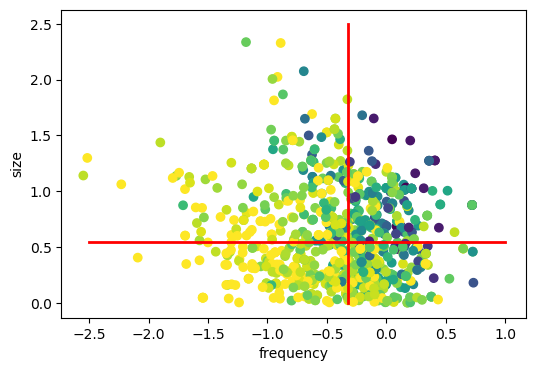

In [75]:
plt.scatter(np.log10(burst_psi_ES2i['frequency']), np.log10(burst_psi_ES2i['size']),
           c = burst_psi_ES2i['psi_binary'], cmap=cm.viridis)

freq_med = burst_psi_ES2i['frequency'].median()
size_med = burst_psi_ES2i['size'].median()
plt.plot([np.log10(freq_med), np.log10(freq_med)], [0, 2.5], c='red', linewidth=2)
plt.plot([-2.5, 1], [np.log10(size_med), np.log10(size_med)], c='red', linewidth=2)
plt.xlabel('frequency')
plt.ylabel('size')
plt.show()

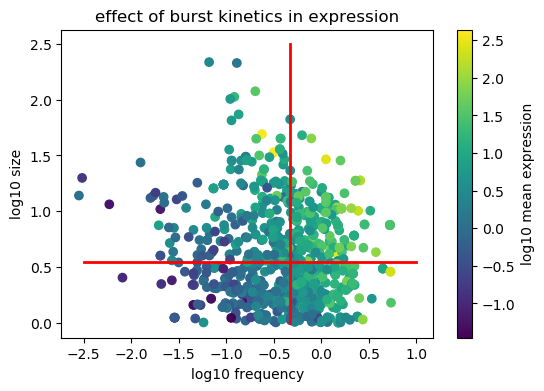

In [263]:
sc = plt.scatter(np.log10(burst_psi_ES2i['frequency']), np.log10(burst_psi_ES2i['size']),
           c = np.log10(burst_psi_ES2i['mean_expression']), cmap=cm.viridis)
plt.colorbar(sc, label='log10 mean expression')
freq_med = burst_psi_ES2i['frequency'].median()
size_med = burst_psi_ES2i['size'].median()
plt.plot([np.log10(freq_med), np.log10(freq_med)], [0, 2.5], c='red', linewidth=2)
plt.plot([-2.5, 1], [np.log10(size_med), np.log10(size_med)], c='red', linewidth=2)
plt.xlabel('log10 frequency')
plt.ylabel('log10 size')
plt.title('effect of burst kinetics in expression')
plt.show()

In [77]:
low_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] < freq_med) & (burst_psi_ES2i['size'] < size_med))].index
bursty_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] < freq_med) & (burst_psi_ES2i['size'] > size_med))].index
rapid_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] > freq_med) & (burst_psi_ES2i['size'] < size_med))].index
massive_exons = burst_psi_ES2i.loc[((burst_psi_ES2i['frequency'] > freq_med) & (burst_psi_ES2i['size'] > size_med))].index

In [78]:
quart_expression = burst_psi_ES2i.mean_expression.quantile(0.25)
three_quart_expression = burst_psi_ES2i.mean_expression.quantile(0.75)
median_expression = burst_psi_ES2i.mean_expression.median()

In [79]:
high_expression = burst_psi_ES2i.loc[burst_psi_ES2i.mean_expression > three_quart_expression].index
low_expression = burst_psi_ES2i.loc[burst_psi_ES2i.mean_expression < quart_expression].index

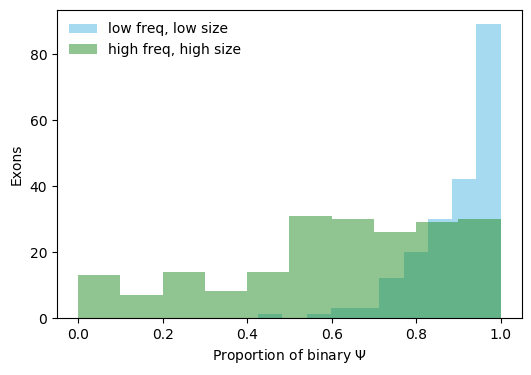

In [80]:
plt.hist(burst_psi_ES2i.loc[low_exons, 'psi_binary'], color='skyblue', alpha=0.75, label='low freq, low size')
plt.hist(burst_psi_ES2i.loc[massive_exons, 'psi_binary'], color='forestgreen', alpha=0.5, label='high freq, high size')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

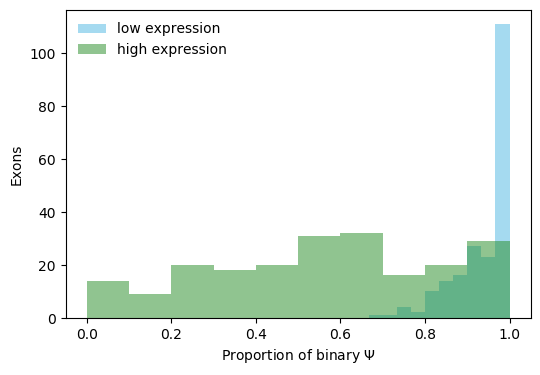

In [81]:
plt.hist(burst_psi_ES2i.loc[low_expression, 'psi_binary'], color='skyblue', alpha=0.75, label='low expression')
plt.hist(burst_psi_ES2i.loc[high_expression, 'psi_binary'], color='forestgreen', alpha=0.5, label='high expression')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

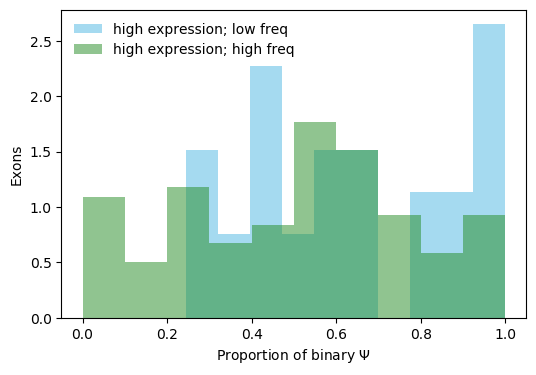

In [82]:
plt.hist(burst_psi_ES2i.loc[[x for x in bursty_exons if (x in high_expression)], 'psi_binary'], 
         color='skyblue', alpha=0.75, density=True, label='high expression; low freq')
# plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
#          color='forestgreen', alpha=0.5, density=True)
plt.hist(burst_psi_ES2i.loc[[x for x in massive_exons if (x in high_expression)], 'psi_binary'], 
         color='forestgreen', alpha=0.5, density=True, label='high expression; high freq')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

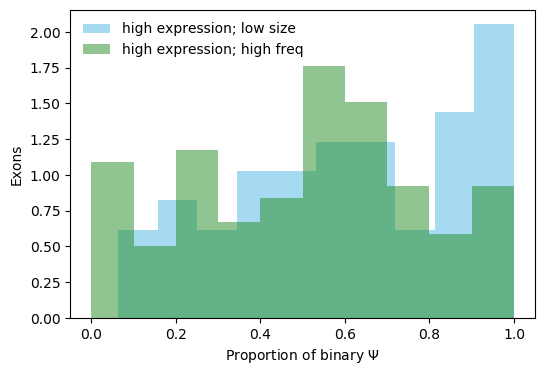

In [83]:
plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
         color='skyblue', alpha=0.75, density=True, label='high expression; low size')
# plt.hist(burst_psi_ES2i.loc[[x for x in rapid_exons if (x in high_expression)], 'psi_binary'], 
#          color='forestgreen', alpha=0.5, density=True)
plt.hist(burst_psi_ES2i.loc[[x for x in massive_exons if (x in high_expression)], 'psi_binary'], 
         color='forestgreen', alpha=0.5, density=True, label='high expression; high freq')
plt.xlabel('Proportion of binary $\Psi$')
plt.ylabel('Exons')
plt.legend(frameon=False)
plt.show()

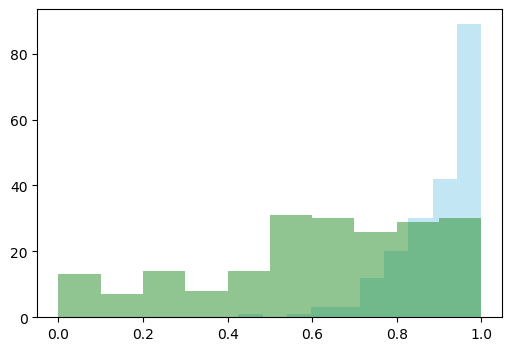

In [84]:
plt.hist(burst_psi_ES2i.loc[low_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[massive_exons, 'psi_binary'], color='forestgreen', alpha=0.5)
plt.show()

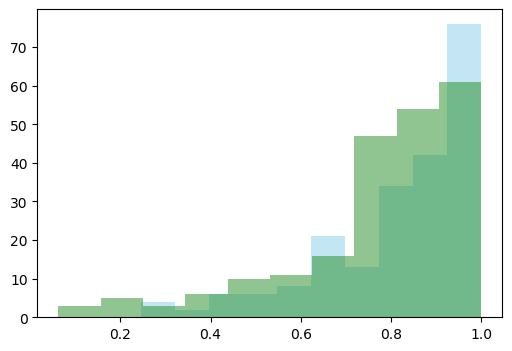

In [85]:
plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5, label='high expression; low freq')
# plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[rapid_exons, 'psi_binary'], color='forestgreen', alpha=0.5, label='high expression; high freq')
plt.show()

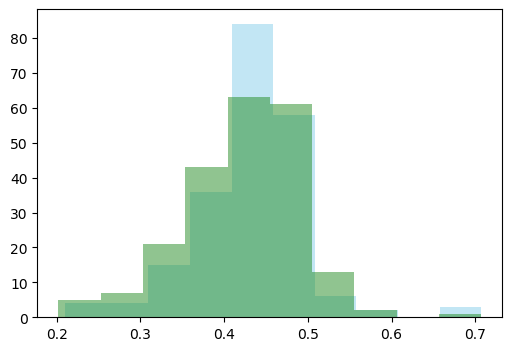

In [86]:
plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_std'], color='skyblue', alpha=0.5)
# plt.hist(burst_psi_ES2i.loc[bursty_exons, 'psi_binary'], color='skyblue', alpha=0.5)
plt.hist(burst_psi_ES2i.loc[rapid_exons, 'psi_std'], color='forestgreen', alpha=0.5)
plt.show()

In [ ]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
#     print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

#     print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    
    mrna_filtered = mrna_tab.loc[PSI_filtered.index].mask(~filter_tab)
    reads_filtered = reads_tab.loc[PSI_filtered.index].mask(~filter_tab)
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons, mrna_filtered, reads_filtered

In [87]:
test_pearson(np.log10(burst_psi.loc[low_exp, 'size']+1), burst_psi.loc[low_exp, 'psi_binary'])

(0.053721095008442216, 0.4397963625647641)

In [88]:
test_pearson(np.log10(burst_psi.loc[med_exp, 'size']+1), burst_psi.loc[med_exp, 'psi_binary'])

(0.05938934967521538, 0.3930014450349632)

In [89]:
test_pearson(np.log10(burst_psi.loc[high_exp, 'size']+1), burst_psi.loc[high_exp, 'psi_binary'])

(-0.06617394741177829, 0.3411111415834544)

In [90]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Acpp_AE', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

NameError: name 'shalek_pca' is not defined

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irf7_1', shalek_pca.index], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [91]:
shalek_LPS = shalek_counts_paper.loc[shalek_counts_paper['Gene Category'] == 'LPS Response', shalek_cells]
from scipy.stats import zscore


NameError: name 'shalek_counts_paper' is not defined

In [ ]:
ztab_shalek_paper = pd.DataFrame(zscore(shalek_LPS, axis=1))
ztab_shalek_paper.columns = shalek_LPS.columns
ztab_shalek_paper.index = shalek_LPS.index
ztab_shalek_paper = ztab_shalek_paper.dropna()
pca1 = PCA(n_components = 2)
pca_shalek_paper = pca1.fit_transform(ztab_shalek_paper.T)
plt.scatter(pca_shalek_paper.T[0], pca_shalek_paper.T[1])#, 
            #c= shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
LPS_genes = shalek_LPS.loc[shalek_LPS.mean(axis=1) > 1].index

In [ ]:
shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)
shalek_tpm_tab = shalek_tpm_tab.loc[shalek_tpm_tab.mean(axis=1) >= 2]

In [ ]:
shalek_tpm_tab.index = [x.upper() for x in shalek_tpm_tab.index]

In [ ]:
shalek_tpm_LPS = shalek_tpm_tab.loc[[x for x in LPS_genes if x in shalek_tpm_tab.index]]

In [ ]:
shalek_tpm_LPS.sub(shalek_tpm_LPS.mean(axis = 1), axis=0).shape


In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_tpm_LPS.loc['WARS', shalek_pca.index], cmap=cm.viridis)
plt.show()

In [ ]:
ztab_shalek_tpm = pd.DataFrame(zscore(shalek_tpm_LPS, axis=1))
ztab_shalek_tpm.columns = shalek_tpm_LPS.columns
ztab_shalek_tpm.index = shalek_tpm_LPS.index
pca1 = PCA(n_components = 2)
pca_shalek_tpm = pca1.fit_transform(ztab_shalek_tpm.T)
plt.scatter(pca_shalek_tpm.T[0], pca_shalek_tpm.T[1], c= shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
pca_shalek_tpm

In [ ]:
event_lista = ['Abi1_7', 'Aldoa_2', 'Anxa4_1', 'Anxa4_2', 'Anxa6_1', 'Ap2m1_1',
       'Atp5j2_2', 'Atp5j_1', 'Capg_1', 'Cd300lf_2', 'Cd40_2', 'Cd44_1',
       'Cd68_1', 'Cd74_1', 'Ciapin1_2', 'Cish_1', 'Cldnd1_3', 'Clec4a2_1',
       'Clec4n_2', 'Clec5a_1', 'Clec7a_other_1', 'Csde1_4', 'Dab2_5',
       'Dnajc8_3', 'Dpep2_2', 'Eef1d_3', 'Eif4g2_1', 'Ergic2_3',
       'Ergic2_nmdSE_1', 'Fcgr2b_1', 'Fcgr2b_2', 'Hnrnpa1_1', 'Hnrnpa2b1_1',
       'Hnrnpa2b1_2', 'Hnrnpa2b1_3', 'Ifi35_1', 'Igf1_1', 'Il2rg_1', 'Irgm1_1',
       'Lat2_1', 'Lcp1_1', 'Ly6e_3', 'Mbnl1_10', 'Mbnl1_2', 'Mbnl1_4',
       'Mbnl1_6', 'Mbnl1_8', 'Mbnl1_9', 'Mndal_1', 'Morf4l1_3', 'Ndufa7_1',
       'Ndufv3_1', 'Prr13_1', 'Ptprc_1', 'Rsu1_1', 'Samhd1_1', 'Sat1_nmdSE_1',
       'Slamf7_1', 'Sp100_1', 'Sp100_2', 'Sp100_4', 'Srsf3_nmdSE_1',
       'Srsf7_nmdSE_1', 'Tank_other_2', 'Tarm1_1', 'Tmbim6_1', 'Tpm3_1',
       'U2surp_2', 'Vps29_1', 'Zfp207_2']

In [ ]:
for events in event_lista:
    print(events)
    plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc[events, shalek_tpm_LPS.columns], cmap=cm.viridis,
               vmax=1, vmin=0)
    plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:


pca1 = PCA(n_components = 2)
pca_shalek_paper = pca1.fit_transform(np.log10(shalek_LPS.loc[shalek_LPS.mean(axis =1 ) >= 10].T+1))

In [ ]:
plt.scatter(pca_shalek_paper.T[0], pca_shalek_paper.T[1])
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Acpp_AE', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Irf7_1', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, 
            c=shalek_PSI.loc['Clec7a_other_1', shalek_tpm_LPS.columns], cmap=cm.viridis, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2, c=shalek_PSI.loc['Irgm1_1', shalek_tpm_LPS.columns], cmap=cm.viridis)
plt.show()

In [ ]:
plt.scatter(shalek_pca.PC1, shalek_pca.PC2)
plt.show()